### Data Preprocessing

Here we do the data processing. Eevey image is shaped in the dimention (128, 128, 3) here. ```hm``` holds the hashmap in the (key, value) pair in the order of (image, class).

In [1]:
import os
#CHANGE THIS to aboslute path of Caltech repo
os.chdir('C:/Users/proti/')
#this is a global variable to set how many subset of classes we will work with 
#CHANGE THIS TO REQUIRED NUMBER (257) while running on GPU
working_classes = 10

```shrink_square``` takes an image and produces a square image

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image


#images are in different shapes. needs to square them.
def shrink_square(img, shrink_size, color_mode, fill_color):
    #all the images will be shrinked to shrink_size with any leftover filled with color_fill
    ## thumbnail resizes image while maintaining aspect ratio
    shrinked_img=img.thumbnail((shrink_size,shrink_size),Image.ANTIALIAS)
    
    #if some images were originally less than shrink_size, bring to shrink size by filling the leftover
    output=Image.new(color_mode,(shrink_size,shrink_size),fill_color)
    output.paste(img, (int((shrink_size - img.size[0]) / 2), int((shrink_size - img.size[1]) / 2)))
    
    return output


#turn images to np_array
def image_to_tensors(img):
    arr=np.array(img)
    return arr

In [3]:
#globally setting up the square size that all images will be resized to
img_size=128

In [4]:
hm={}
path='./256_ObjectCategories'
folders=os.listdir(path)


for folder in folders:
    os.chdir(path+'/'+folder)
    image_paths=os.listdir()
    class_images=[]
    for i in image_paths:
        if i[-4:]=='.jpg':
            print("processing ",i)
            img=Image.open(i)
            shrinked_img=shrink_square(img, img_size, 'RGB', 0)
            img_arr=image_to_tensors(shrinked_img)
            img_arr=img_arr/255 #scaling pixel values to [0,1]
            class_images.append(img_arr)
            img.close()
            shrinked_img.close()
    class_name= folder.split('.')[1]
    hm[class_name]=class_images
    os.chdir('../..')

processing  001_0001.jpg
processing  001_0002.jpg
processing  001_0003.jpg
processing  001_0004.jpg
processing  001_0005.jpg
processing  001_0006.jpg
processing  001_0007.jpg
processing  001_0008.jpg
processing  001_0009.jpg
processing  001_0010.jpg
processing  001_0011.jpg
processing  001_0012.jpg
processing  001_0013.jpg
processing  001_0014.jpg
processing  001_0015.jpg
processing  001_0016.jpg
processing  001_0017.jpg
processing  001_0018.jpg
processing  001_0019.jpg
processing  001_0020.jpg
processing  001_0021.jpg
processing  001_0022.jpg
processing  001_0023.jpg
processing  001_0024.jpg
processing  001_0025.jpg
processing  001_0026.jpg
processing  001_0027.jpg
processing  001_0028.jpg
processing  001_0029.jpg
processing  001_0030.jpg
processing  001_0031.jpg
processing  001_0032.jpg
processing  001_0033.jpg
processing  001_0034.jpg
processing  001_0035.jpg
processing  001_0036.jpg
processing  001_0037.jpg
processing  001_0038.jpg
processing  001_0039.jpg
processing  001_0040.jpg


processing  003_0149.jpg
processing  003_0150.jpg
processing  003_0151.jpg
processing  004_0001.jpg
processing  004_0002.jpg
processing  004_0003.jpg
processing  004_0004.jpg
processing  004_0005.jpg
processing  004_0006.jpg
processing  004_0007.jpg
processing  004_0008.jpg
processing  004_0009.jpg
processing  004_0010.jpg
processing  004_0011.jpg
processing  004_0012.jpg
processing  004_0013.jpg
processing  004_0014.jpg
processing  004_0015.jpg
processing  004_0016.jpg
processing  004_0017.jpg
processing  004_0018.jpg
processing  004_0019.jpg
processing  004_0020.jpg
processing  004_0021.jpg
processing  004_0022.jpg
processing  004_0023.jpg
processing  004_0024.jpg
processing  004_0025.jpg
processing  004_0026.jpg
processing  004_0027.jpg
processing  004_0028.jpg
processing  004_0029.jpg
processing  004_0030.jpg
processing  004_0031.jpg
processing  004_0032.jpg
processing  004_0033.jpg
processing  004_0034.jpg
processing  004_0035.jpg
processing  004_0036.jpg
processing  004_0037.jpg


processing  006_0082.jpg
processing  006_0083.jpg
processing  006_0084.jpg
processing  006_0085.jpg
processing  006_0086.jpg
processing  006_0087.jpg
processing  006_0088.jpg
processing  006_0089.jpg
processing  006_0090.jpg
processing  007_0001.jpg
processing  007_0002.jpg
processing  007_0003.jpg
processing  007_0004.jpg
processing  007_0005.jpg
processing  007_0006.jpg
processing  007_0007.jpg
processing  007_0008.jpg
processing  007_0009.jpg
processing  007_0010.jpg
processing  007_0011.jpg
processing  007_0012.jpg
processing  007_0013.jpg
processing  007_0014.jpg
processing  007_0015.jpg
processing  007_0016.jpg
processing  007_0017.jpg
processing  007_0018.jpg
processing  007_0019.jpg
processing  007_0020.jpg
processing  007_0021.jpg
processing  007_0022.jpg
processing  007_0023.jpg
processing  007_0024.jpg
processing  007_0025.jpg
processing  007_0026.jpg
processing  007_0027.jpg
processing  007_0028.jpg
processing  007_0029.jpg
processing  007_0030.jpg
processing  007_0031.jpg


processing  009_0016.jpg
processing  009_0017.jpg
processing  009_0018.jpg
processing  009_0019.jpg
processing  009_0020.jpg
processing  009_0021.jpg
processing  009_0022.jpg
processing  009_0023.jpg
processing  009_0024.jpg
processing  009_0025.jpg
processing  009_0026.jpg
processing  009_0027.jpg
processing  009_0028.jpg
processing  009_0029.jpg
processing  009_0030.jpg
processing  009_0031.jpg
processing  009_0032.jpg
processing  009_0033.jpg
processing  009_0034.jpg
processing  009_0035.jpg
processing  009_0036.jpg
processing  009_0037.jpg
processing  009_0038.jpg
processing  009_0039.jpg
processing  009_0040.jpg
processing  009_0041.jpg
processing  009_0042.jpg
processing  009_0043.jpg
processing  009_0044.jpg
processing  009_0045.jpg
processing  009_0046.jpg
processing  009_0047.jpg
processing  009_0048.jpg
processing  009_0049.jpg
processing  009_0050.jpg
processing  009_0051.jpg
processing  009_0052.jpg
processing  009_0053.jpg
processing  009_0054.jpg
processing  009_0055.jpg


processing  011_0194.jpg
processing  011_0195.jpg
processing  011_0196.jpg
processing  011_0197.jpg
processing  011_0198.jpg
processing  011_0199.jpg
processing  011_0200.jpg
processing  011_0201.jpg
processing  011_0202.jpg
processing  011_0203.jpg
processing  011_0204.jpg
processing  011_0205.jpg
processing  011_0206.jpg
processing  011_0207.jpg
processing  011_0208.jpg
processing  011_0209.jpg
processing  011_0210.jpg
processing  011_0211.jpg
processing  011_0212.jpg
processing  011_0213.jpg
processing  011_0214.jpg
processing  011_0215.jpg
processing  011_0216.jpg
processing  011_0217.jpg
processing  011_0218.jpg
processing  011_0219.jpg
processing  011_0220.jpg
processing  011_0221.jpg
processing  011_0222.jpg
processing  011_0223.jpg
processing  011_0224.jpg
processing  011_0225.jpg
processing  011_0226.jpg
processing  011_0227.jpg
processing  011_0228.jpg
processing  011_0229.jpg
processing  011_0230.jpg
processing  011_0231.jpg
processing  011_0232.jpg
processing  011_0233.jpg


processing  013_0047.jpg
processing  013_0048.jpg
processing  013_0049.jpg
processing  013_0050.jpg
processing  013_0051.jpg
processing  013_0052.jpg
processing  013_0053.jpg
processing  013_0054.jpg
processing  013_0055.jpg
processing  013_0056.jpg
processing  013_0057.jpg
processing  013_0058.jpg
processing  013_0059.jpg
processing  013_0060.jpg
processing  013_0061.jpg
processing  013_0062.jpg
processing  013_0063.jpg
processing  013_0064.jpg
processing  013_0065.jpg
processing  013_0066.jpg
processing  013_0067.jpg
processing  013_0068.jpg
processing  013_0069.jpg
processing  013_0070.jpg
processing  013_0071.jpg
processing  013_0072.jpg
processing  013_0073.jpg
processing  013_0074.jpg
processing  013_0075.jpg
processing  013_0076.jpg
processing  013_0077.jpg
processing  013_0078.jpg
processing  013_0079.jpg
processing  013_0080.jpg
processing  013_0081.jpg
processing  013_0082.jpg
processing  013_0083.jpg
processing  013_0084.jpg
processing  013_0085.jpg
processing  013_0086.jpg


processing  017_0007.jpg
processing  017_0008.jpg
processing  017_0009.jpg
processing  017_0010.jpg
processing  017_0011.jpg
processing  017_0012.jpg
processing  017_0013.jpg
processing  017_0014.jpg
processing  017_0015.jpg
processing  017_0016.jpg
processing  017_0017.jpg
processing  017_0018.jpg
processing  017_0019.jpg
processing  017_0020.jpg
processing  017_0021.jpg
processing  017_0022.jpg
processing  017_0023.jpg
processing  017_0024.jpg
processing  017_0025.jpg
processing  017_0026.jpg
processing  017_0027.jpg
processing  017_0028.jpg
processing  017_0029.jpg
processing  017_0030.jpg
processing  017_0031.jpg
processing  017_0032.jpg
processing  017_0033.jpg
processing  017_0034.jpg
processing  017_0035.jpg
processing  017_0036.jpg
processing  017_0037.jpg
processing  017_0038.jpg
processing  017_0039.jpg
processing  017_0040.jpg
processing  017_0041.jpg
processing  017_0042.jpg
processing  017_0043.jpg
processing  017_0044.jpg
processing  017_0045.jpg
processing  017_0046.jpg


processing  020_0049.jpg
processing  020_0050.jpg
processing  020_0051.jpg
processing  020_0052.jpg
processing  020_0053.jpg
processing  020_0054.jpg
processing  020_0055.jpg
processing  020_0056.jpg
processing  020_0057.jpg
processing  020_0058.jpg
processing  020_0059.jpg
processing  020_0060.jpg
processing  020_0061.jpg
processing  020_0062.jpg
processing  020_0063.jpg
processing  020_0064.jpg
processing  020_0065.jpg
processing  020_0066.jpg
processing  020_0067.jpg
processing  020_0068.jpg
processing  020_0069.jpg
processing  020_0070.jpg
processing  020_0071.jpg
processing  020_0072.jpg
processing  020_0073.jpg
processing  020_0074.jpg
processing  020_0075.jpg
processing  020_0076.jpg
processing  020_0077.jpg
processing  020_0078.jpg
processing  020_0079.jpg
processing  020_0080.jpg
processing  020_0081.jpg
processing  020_0082.jpg
processing  020_0083.jpg
processing  021_0001.jpg
processing  021_0002.jpg
processing  021_0003.jpg
processing  021_0004.jpg
processing  021_0005.jpg


processing  023_0107.jpg
processing  023_0108.jpg
processing  023_0109.jpg
processing  023_0110.jpg
processing  024_0001.jpg
processing  024_0002.jpg
processing  024_0003.jpg
processing  024_0004.jpg
processing  024_0005.jpg
processing  024_0006.jpg
processing  024_0007.jpg
processing  024_0008.jpg
processing  024_0009.jpg
processing  024_0010.jpg
processing  024_0011.jpg
processing  024_0012.jpg
processing  024_0013.jpg
processing  024_0014.jpg
processing  024_0015.jpg
processing  024_0016.jpg
processing  024_0017.jpg
processing  024_0018.jpg
processing  024_0019.jpg
processing  024_0020.jpg
processing  024_0021.jpg
processing  024_0022.jpg
processing  024_0023.jpg
processing  024_0024.jpg
processing  024_0025.jpg
processing  024_0026.jpg
processing  024_0027.jpg
processing  024_0028.jpg
processing  024_0029.jpg
processing  024_0030.jpg
processing  024_0031.jpg
processing  024_0032.jpg
processing  024_0033.jpg
processing  024_0034.jpg
processing  024_0035.jpg
processing  024_0036.jpg


processing  027_0067.jpg
processing  027_0068.jpg
processing  027_0069.jpg
processing  027_0070.jpg
processing  027_0071.jpg
processing  027_0072.jpg
processing  027_0073.jpg
processing  027_0074.jpg
processing  027_0075.jpg
processing  027_0076.jpg
processing  027_0077.jpg
processing  027_0078.jpg
processing  027_0079.jpg
processing  027_0080.jpg
processing  027_0081.jpg
processing  027_0082.jpg
processing  027_0083.jpg
processing  027_0084.jpg
processing  027_0085.jpg
processing  027_0086.jpg
processing  027_0087.jpg
processing  027_0088.jpg
processing  027_0089.jpg
processing  027_0090.jpg
processing  027_0091.jpg
processing  027_0092.jpg
processing  027_0093.jpg
processing  027_0094.jpg
processing  027_0095.jpg
processing  027_0096.jpg
processing  027_0097.jpg
processing  027_0098.jpg
processing  027_0099.jpg
processing  027_0100.jpg
processing  028_0001.jpg
processing  028_0002.jpg
processing  028_0003.jpg
processing  028_0004.jpg
processing  028_0005.jpg
processing  028_0006.jpg


processing  031_0018.jpg
processing  031_0019.jpg
processing  031_0020.jpg
processing  031_0021.jpg
processing  031_0022.jpg
processing  031_0023.jpg
processing  031_0024.jpg
processing  031_0025.jpg
processing  031_0026.jpg
processing  031_0027.jpg
processing  031_0028.jpg
processing  031_0029.jpg
processing  031_0030.jpg
processing  031_0031.jpg
processing  031_0032.jpg
processing  031_0033.jpg
processing  031_0034.jpg
processing  031_0035.jpg
processing  031_0036.jpg
processing  031_0037.jpg
processing  031_0038.jpg
processing  031_0039.jpg
processing  031_0040.jpg
processing  031_0041.jpg
processing  031_0042.jpg
processing  031_0043.jpg
processing  031_0044.jpg
processing  031_0045.jpg
processing  031_0046.jpg
processing  031_0047.jpg
processing  031_0048.jpg
processing  031_0049.jpg
processing  031_0050.jpg
processing  031_0051.jpg
processing  031_0052.jpg
processing  031_0053.jpg
processing  031_0054.jpg
processing  031_0055.jpg
processing  031_0056.jpg
processing  031_0057.jpg


processing  034_0058.jpg
processing  034_0059.jpg
processing  034_0060.jpg
processing  034_0061.jpg
processing  034_0062.jpg
processing  034_0063.jpg
processing  034_0064.jpg
processing  034_0065.jpg
processing  034_0066.jpg
processing  034_0067.jpg
processing  034_0068.jpg
processing  034_0069.jpg
processing  034_0070.jpg
processing  034_0071.jpg
processing  034_0072.jpg
processing  034_0073.jpg
processing  034_0074.jpg
processing  034_0075.jpg
processing  034_0076.jpg
processing  034_0077.jpg
processing  034_0078.jpg
processing  034_0079.jpg
processing  034_0080.jpg
processing  034_0081.jpg
processing  034_0082.jpg
processing  034_0083.jpg
processing  034_0084.jpg
processing  034_0085.jpg
processing  034_0086.jpg
processing  034_0087.jpg
processing  034_0088.jpg
processing  034_0089.jpg
processing  034_0090.jpg
processing  034_0091.jpg
processing  034_0092.jpg
processing  034_0093.jpg
processing  034_0094.jpg
processing  034_0095.jpg
processing  034_0096.jpg
processing  034_0097.jpg


processing  037_0105.jpg
processing  037_0106.jpg
processing  037_0107.jpg
processing  037_0108.jpg
processing  037_0109.jpg
processing  037_0110.jpg
processing  037_0111.jpg
processing  037_0112.jpg
processing  037_0113.jpg
processing  037_0114.jpg
processing  037_0115.jpg
processing  037_0116.jpg
processing  037_0117.jpg
processing  037_0118.jpg
processing  037_0119.jpg
processing  037_0120.jpg
processing  038_0001.jpg
processing  038_0002.jpg
processing  038_0003.jpg
processing  038_0004.jpg
processing  038_0005.jpg
processing  038_0006.jpg
processing  038_0007.jpg
processing  038_0008.jpg
processing  038_0009.jpg
processing  038_0010.jpg
processing  038_0011.jpg
processing  038_0012.jpg
processing  038_0013.jpg
processing  038_0014.jpg
processing  038_0015.jpg
processing  038_0016.jpg
processing  038_0017.jpg
processing  038_0018.jpg
processing  038_0019.jpg
processing  038_0020.jpg
processing  038_0021.jpg
processing  038_0022.jpg
processing  038_0023.jpg
processing  038_0024.jpg


processing  041_0008.jpg
processing  041_0009.jpg
processing  041_0010.jpg
processing  041_0011.jpg
processing  041_0012.jpg
processing  041_0013.jpg
processing  041_0014.jpg
processing  041_0015.jpg
processing  041_0016.jpg
processing  041_0017.jpg
processing  041_0018.jpg
processing  041_0019.jpg
processing  041_0020.jpg
processing  041_0021.jpg
processing  041_0022.jpg
processing  041_0023.jpg
processing  041_0024.jpg
processing  041_0025.jpg
processing  041_0026.jpg
processing  041_0027.jpg
processing  041_0028.jpg
processing  041_0029.jpg
processing  041_0030.jpg
processing  041_0031.jpg
processing  041_0032.jpg
processing  041_0033.jpg
processing  041_0034.jpg
processing  041_0035.jpg
processing  041_0036.jpg
processing  041_0037.jpg
processing  041_0038.jpg
processing  041_0039.jpg
processing  041_0040.jpg
processing  041_0041.jpg
processing  041_0042.jpg
processing  041_0043.jpg
processing  041_0044.jpg
processing  041_0045.jpg
processing  041_0046.jpg
processing  041_0047.jpg


processing  044_0091.jpg
processing  044_0092.jpg
processing  044_0093.jpg
processing  044_0094.jpg
processing  044_0095.jpg
processing  044_0096.jpg
processing  044_0097.jpg
processing  044_0098.jpg
processing  044_0099.jpg
processing  044_0100.jpg
processing  044_0101.jpg
processing  044_0102.jpg
processing  044_0103.jpg
processing  044_0104.jpg
processing  044_0105.jpg
processing  044_0106.jpg
processing  044_0107.jpg
processing  044_0108.jpg
processing  044_0109.jpg
processing  044_0110.jpg
processing  044_0111.jpg
processing  044_0112.jpg
processing  044_0113.jpg
processing  044_0114.jpg
processing  044_0115.jpg
processing  044_0116.jpg
processing  044_0117.jpg
processing  044_0118.jpg
processing  044_0119.jpg
processing  044_0120.jpg
processing  044_0121.jpg
processing  045_0001.jpg
processing  045_0002.jpg
processing  045_0003.jpg
processing  045_0004.jpg
processing  045_0005.jpg
processing  045_0006.jpg
processing  045_0007.jpg
processing  045_0008.jpg
processing  045_0009.jpg


processing  047_0085.jpg
processing  047_0086.jpg
processing  047_0087.jpg
processing  047_0088.jpg
processing  047_0089.jpg
processing  047_0090.jpg
processing  047_0091.jpg
processing  047_0092.jpg
processing  047_0093.jpg
processing  047_0094.jpg
processing  048_0001.jpg
processing  048_0002.jpg
processing  048_0003.jpg
processing  048_0004.jpg
processing  048_0005.jpg
processing  048_0006.jpg
processing  048_0007.jpg
processing  048_0008.jpg
processing  048_0009.jpg
processing  048_0010.jpg
processing  048_0011.jpg
processing  048_0012.jpg
processing  048_0013.jpg
processing  048_0014.jpg
processing  048_0015.jpg
processing  048_0016.jpg
processing  048_0017.jpg
processing  048_0018.jpg
processing  048_0019.jpg
processing  048_0020.jpg
processing  048_0021.jpg
processing  048_0022.jpg
processing  048_0023.jpg
processing  048_0024.jpg
processing  048_0025.jpg
processing  048_0026.jpg
processing  048_0027.jpg
processing  048_0028.jpg
processing  048_0029.jpg
processing  048_0030.jpg


processing  051_0052.jpg
processing  051_0053.jpg
processing  051_0054.jpg
processing  051_0055.jpg
processing  051_0056.jpg
processing  051_0057.jpg
processing  051_0058.jpg
processing  051_0059.jpg
processing  051_0060.jpg
processing  051_0061.jpg
processing  051_0062.jpg
processing  051_0063.jpg
processing  051_0064.jpg
processing  051_0065.jpg
processing  051_0066.jpg
processing  051_0067.jpg
processing  051_0068.jpg
processing  051_0069.jpg
processing  051_0070.jpg
processing  051_0071.jpg
processing  051_0072.jpg
processing  051_0073.jpg
processing  051_0074.jpg
processing  051_0075.jpg
processing  051_0076.jpg
processing  051_0077.jpg
processing  051_0078.jpg
processing  051_0079.jpg
processing  051_0080.jpg
processing  051_0081.jpg
processing  051_0082.jpg
processing  051_0083.jpg
processing  051_0084.jpg
processing  051_0085.jpg
processing  051_0086.jpg
processing  051_0087.jpg
processing  051_0088.jpg
processing  051_0089.jpg
processing  051_0090.jpg
processing  051_0091.jpg


processing  055_0016.jpg
processing  055_0017.jpg
processing  055_0018.jpg
processing  055_0019.jpg
processing  055_0020.jpg
processing  055_0021.jpg
processing  055_0022.jpg
processing  055_0023.jpg
processing  055_0024.jpg
processing  055_0025.jpg
processing  055_0026.jpg
processing  055_0027.jpg
processing  055_0028.jpg
processing  055_0029.jpg
processing  055_0030.jpg
processing  055_0031.jpg
processing  055_0032.jpg
processing  055_0033.jpg
processing  055_0034.jpg
processing  055_0035.jpg
processing  055_0036.jpg
processing  055_0037.jpg
processing  055_0038.jpg
processing  055_0039.jpg
processing  055_0040.jpg
processing  055_0041.jpg
processing  055_0042.jpg
processing  055_0043.jpg
processing  055_0044.jpg
processing  055_0045.jpg
processing  055_0046.jpg
processing  055_0047.jpg
processing  055_0048.jpg
processing  055_0049.jpg
processing  055_0050.jpg
processing  055_0051.jpg
processing  055_0052.jpg
processing  055_0053.jpg
processing  055_0054.jpg
processing  055_0055.jpg


processing  058_0040.jpg
processing  058_0041.jpg
processing  058_0042.jpg
processing  058_0043.jpg
processing  058_0044.jpg
processing  058_0045.jpg
processing  058_0046.jpg
processing  058_0047.jpg
processing  058_0048.jpg
processing  058_0049.jpg
processing  058_0050.jpg
processing  058_0051.jpg
processing  058_0052.jpg
processing  058_0053.jpg
processing  058_0054.jpg
processing  058_0055.jpg
processing  058_0056.jpg
processing  058_0057.jpg
processing  058_0058.jpg
processing  058_0059.jpg
processing  058_0060.jpg
processing  058_0061.jpg
processing  058_0062.jpg
processing  058_0063.jpg
processing  058_0064.jpg
processing  058_0065.jpg
processing  058_0066.jpg
processing  058_0067.jpg
processing  058_0068.jpg
processing  058_0069.jpg
processing  058_0070.jpg
processing  058_0071.jpg
processing  058_0072.jpg
processing  058_0073.jpg
processing  058_0074.jpg
processing  058_0075.jpg
processing  058_0076.jpg
processing  058_0077.jpg
processing  058_0078.jpg
processing  058_0079.jpg


processing  062_0059.jpg
processing  062_0060.jpg
processing  062_0061.jpg
processing  062_0062.jpg
processing  062_0063.jpg
processing  062_0064.jpg
processing  062_0065.jpg
processing  062_0066.jpg
processing  062_0067.jpg
processing  062_0068.jpg
processing  062_0069.jpg
processing  062_0070.jpg
processing  062_0071.jpg
processing  062_0072.jpg
processing  062_0073.jpg
processing  062_0074.jpg
processing  062_0075.jpg
processing  062_0076.jpg
processing  062_0077.jpg
processing  062_0078.jpg
processing  062_0079.jpg
processing  062_0080.jpg
processing  062_0081.jpg
processing  062_0082.jpg
processing  062_0083.jpg
processing  063_0001.jpg
processing  063_0002.jpg
processing  063_0003.jpg
processing  063_0004.jpg
processing  063_0005.jpg
processing  063_0006.jpg
processing  063_0007.jpg
processing  063_0008.jpg
processing  063_0009.jpg
processing  063_0010.jpg
processing  063_0011.jpg
processing  063_0012.jpg
processing  063_0013.jpg
processing  063_0014.jpg
processing  063_0015.jpg


processing  065_0068.jpg
processing  065_0069.jpg
processing  065_0070.jpg
processing  065_0071.jpg
processing  065_0072.jpg
processing  065_0073.jpg
processing  065_0074.jpg
processing  065_0075.jpg
processing  065_0076.jpg
processing  065_0077.jpg
processing  065_0078.jpg
processing  065_0079.jpg
processing  065_0080.jpg
processing  065_0081.jpg
processing  065_0082.jpg
processing  065_0083.jpg
processing  065_0084.jpg
processing  065_0085.jpg
processing  065_0086.jpg
processing  065_0087.jpg
processing  065_0088.jpg
processing  065_0089.jpg
processing  065_0090.jpg
processing  065_0091.jpg
processing  065_0092.jpg
processing  065_0093.jpg
processing  065_0094.jpg
processing  065_0095.jpg
processing  065_0096.jpg
processing  065_0097.jpg
processing  065_0098.jpg
processing  065_0099.jpg
processing  065_0100.jpg
processing  065_0101.jpg
processing  066_0001.jpg
processing  066_0002.jpg
processing  066_0003.jpg
processing  066_0004.jpg
processing  066_0005.jpg
processing  066_0006.jpg


processing  069_0069.jpg
processing  069_0070.jpg
processing  069_0071.jpg
processing  069_0072.jpg
processing  069_0073.jpg
processing  069_0074.jpg
processing  069_0075.jpg
processing  069_0076.jpg
processing  069_0077.jpg
processing  069_0078.jpg
processing  069_0079.jpg
processing  069_0080.jpg
processing  069_0081.jpg
processing  069_0082.jpg
processing  069_0083.jpg
processing  069_0084.jpg
processing  069_0085.jpg
processing  069_0086.jpg
processing  069_0087.jpg
processing  069_0088.jpg
processing  069_0089.jpg
processing  069_0090.jpg
processing  069_0091.jpg
processing  069_0092.jpg
processing  069_0093.jpg
processing  069_0094.jpg
processing  069_0095.jpg
processing  069_0096.jpg
processing  069_0097.jpg
processing  069_0098.jpg
processing  069_0099.jpg
processing  070_0001.jpg
processing  070_0002.jpg
processing  070_0003.jpg
processing  070_0004.jpg
processing  070_0005.jpg
processing  070_0006.jpg
processing  070_0007.jpg
processing  070_0008.jpg
processing  070_0009.jpg


processing  073_0038.jpg
processing  073_0039.jpg
processing  073_0040.jpg
processing  073_0041.jpg
processing  073_0042.jpg
processing  073_0043.jpg
processing  073_0044.jpg
processing  073_0045.jpg
processing  073_0046.jpg
processing  073_0047.jpg
processing  073_0048.jpg
processing  073_0049.jpg
processing  073_0050.jpg
processing  073_0051.jpg
processing  073_0052.jpg
processing  073_0053.jpg
processing  073_0054.jpg
processing  073_0055.jpg
processing  073_0056.jpg
processing  073_0057.jpg
processing  073_0058.jpg
processing  073_0059.jpg
processing  073_0060.jpg
processing  073_0061.jpg
processing  073_0062.jpg
processing  073_0063.jpg
processing  073_0064.jpg
processing  073_0065.jpg
processing  073_0066.jpg
processing  073_0067.jpg
processing  073_0068.jpg
processing  073_0069.jpg
processing  073_0070.jpg
processing  073_0071.jpg
processing  073_0072.jpg
processing  073_0073.jpg
processing  073_0074.jpg
processing  073_0075.jpg
processing  073_0076.jpg
processing  073_0077.jpg


processing  077_0001.jpg
processing  077_0002.jpg
processing  077_0003.jpg
processing  077_0004.jpg
processing  077_0005.jpg
processing  077_0006.jpg
processing  077_0007.jpg
processing  077_0008.jpg
processing  077_0009.jpg
processing  077_0010.jpg
processing  077_0011.jpg
processing  077_0012.jpg
processing  077_0013.jpg
processing  077_0014.jpg
processing  077_0015.jpg
processing  077_0016.jpg
processing  077_0017.jpg
processing  077_0018.jpg
processing  077_0019.jpg
processing  077_0020.jpg
processing  077_0021.jpg
processing  077_0022.jpg
processing  077_0023.jpg
processing  077_0024.jpg
processing  077_0025.jpg
processing  077_0026.jpg
processing  077_0027.jpg
processing  077_0028.jpg
processing  077_0029.jpg
processing  077_0030.jpg
processing  077_0031.jpg
processing  077_0032.jpg
processing  077_0033.jpg
processing  077_0034.jpg
processing  077_0035.jpg
processing  077_0036.jpg
processing  077_0037.jpg
processing  077_0038.jpg
processing  077_0039.jpg
processing  077_0040.jpg


processing  080_0070.jpg
processing  080_0071.jpg
processing  080_0072.jpg
processing  080_0073.jpg
processing  080_0074.jpg
processing  080_0075.jpg
processing  080_0076.jpg
processing  080_0077.jpg
processing  080_0078.jpg
processing  080_0079.jpg
processing  080_0080.jpg
processing  080_0081.jpg
processing  080_0082.jpg
processing  080_0083.jpg
processing  080_0084.jpg
processing  080_0085.jpg
processing  080_0086.jpg
processing  080_0087.jpg
processing  080_0088.jpg
processing  080_0089.jpg
processing  080_0090.jpg
processing  080_0091.jpg
processing  080_0092.jpg
processing  080_0093.jpg
processing  080_0094.jpg
processing  080_0095.jpg
processing  080_0096.jpg
processing  080_0097.jpg
processing  080_0098.jpg
processing  080_0099.jpg
processing  080_0100.jpg
processing  080_0101.jpg
processing  080_0102.jpg
processing  080_0103.jpg
processing  080_0104.jpg
processing  080_0105.jpg
processing  080_0106.jpg
processing  080_0107.jpg
processing  080_0108.jpg
processing  080_0109.jpg


processing  084_0012.jpg
processing  084_0013.jpg
processing  084_0014.jpg
processing  084_0015.jpg
processing  084_0016.jpg
processing  084_0017.jpg
processing  084_0018.jpg
processing  084_0019.jpg
processing  084_0020.jpg
processing  084_0021.jpg
processing  084_0022.jpg
processing  084_0023.jpg
processing  084_0024.jpg
processing  084_0025.jpg
processing  084_0026.jpg
processing  084_0027.jpg
processing  084_0028.jpg
processing  084_0029.jpg
processing  084_0030.jpg
processing  084_0031.jpg
processing  084_0032.jpg
processing  084_0033.jpg
processing  084_0034.jpg
processing  084_0035.jpg
processing  084_0036.jpg
processing  084_0037.jpg
processing  084_0038.jpg
processing  084_0039.jpg
processing  084_0040.jpg
processing  084_0041.jpg
processing  084_0042.jpg
processing  084_0043.jpg
processing  084_0044.jpg
processing  084_0045.jpg
processing  084_0046.jpg
processing  084_0047.jpg
processing  084_0048.jpg
processing  084_0049.jpg
processing  084_0050.jpg
processing  084_0051.jpg


processing  087_0071.jpg
processing  087_0072.jpg
processing  087_0073.jpg
processing  087_0074.jpg
processing  087_0075.jpg
processing  087_0076.jpg
processing  087_0077.jpg
processing  087_0078.jpg
processing  087_0079.jpg
processing  087_0080.jpg
processing  087_0081.jpg
processing  087_0082.jpg
processing  087_0083.jpg
processing  087_0084.jpg
processing  087_0085.jpg
processing  087_0086.jpg
processing  087_0087.jpg
processing  087_0088.jpg
processing  087_0089.jpg
processing  087_0090.jpg
processing  087_0091.jpg
processing  087_0092.jpg
processing  087_0093.jpg
processing  088_0001.jpg
processing  088_0002.jpg
processing  088_0003.jpg
processing  088_0004.jpg
processing  088_0005.jpg
processing  088_0006.jpg
processing  088_0007.jpg
processing  088_0008.jpg
processing  088_0009.jpg
processing  088_0010.jpg
processing  088_0011.jpg
processing  088_0012.jpg
processing  088_0013.jpg
processing  088_0014.jpg
processing  088_0015.jpg
processing  088_0016.jpg
processing  088_0017.jpg


processing  090_0122.jpg
processing  090_0123.jpg
processing  090_0124.jpg
processing  090_0125.jpg
processing  090_0126.jpg
processing  090_0127.jpg
processing  090_0128.jpg
processing  090_0129.jpg
processing  090_0130.jpg
processing  090_0131.jpg
processing  090_0132.jpg
processing  090_0133.jpg
processing  090_0134.jpg
processing  090_0135.jpg
processing  090_0136.jpg
processing  090_0137.jpg
processing  090_0138.jpg
processing  090_0139.jpg
processing  090_0140.jpg
processing  090_0141.jpg
processing  090_0142.jpg
processing  090_0143.jpg
processing  090_0144.jpg
processing  090_0145.jpg
processing  090_0146.jpg
processing  090_0147.jpg
processing  090_0148.jpg
processing  090_0149.jpg
processing  090_0150.jpg
processing  090_0151.jpg
processing  090_0152.jpg
processing  090_0153.jpg
processing  090_0154.jpg
processing  090_0155.jpg
processing  090_0156.jpg
processing  090_0157.jpg
processing  090_0158.jpg
processing  090_0159.jpg
processing  090_0160.jpg
processing  090_0161.jpg


processing  092_0154.jpg
processing  092_0155.jpg
processing  092_0156.jpg
processing  092_0157.jpg
processing  092_0158.jpg
processing  092_0159.jpg
processing  092_0160.jpg
processing  092_0161.jpg
processing  092_0162.jpg
processing  092_0163.jpg
processing  092_0164.jpg
processing  092_0165.jpg
processing  092_0166.jpg
processing  092_0167.jpg
processing  092_0168.jpg
processing  092_0169.jpg
processing  092_0170.jpg
processing  092_0171.jpg
processing  092_0172.jpg
processing  092_0173.jpg
processing  092_0174.jpg
processing  092_0175.jpg
processing  092_0176.jpg
processing  092_0177.jpg
processing  092_0178.jpg
processing  092_0179.jpg
processing  092_0180.jpg
processing  092_0181.jpg
processing  092_0182.jpg
processing  092_0183.jpg
processing  092_0184.jpg
processing  092_0185.jpg
processing  092_0186.jpg
processing  092_0187.jpg
processing  092_0188.jpg
processing  092_0189.jpg
processing  092_0190.jpg
processing  092_0191.jpg
processing  092_0192.jpg
processing  092_0193.jpg


processing  095_0080.jpg
processing  095_0081.jpg
processing  095_0082.jpg
processing  095_0083.jpg
processing  095_0084.jpg
processing  095_0085.jpg
processing  095_0086.jpg
processing  096_0001.jpg
processing  096_0002.jpg
processing  096_0003.jpg
processing  096_0004.jpg
processing  096_0005.jpg
processing  096_0006.jpg
processing  096_0007.jpg
processing  096_0008.jpg
processing  096_0009.jpg
processing  096_0010.jpg
processing  096_0011.jpg
processing  096_0012.jpg
processing  096_0013.jpg
processing  096_0014.jpg
processing  096_0015.jpg
processing  096_0016.jpg
processing  096_0017.jpg
processing  096_0018.jpg
processing  096_0019.jpg
processing  096_0020.jpg
processing  096_0021.jpg
processing  096_0022.jpg
processing  096_0023.jpg
processing  096_0024.jpg
processing  096_0025.jpg
processing  096_0026.jpg
processing  096_0027.jpg
processing  096_0028.jpg
processing  096_0029.jpg
processing  096_0030.jpg
processing  096_0031.jpg
processing  096_0032.jpg
processing  096_0033.jpg


processing  097_0053.jpg
processing  097_0054.jpg
processing  097_0055.jpg
processing  097_0056.jpg
processing  097_0057.jpg
processing  097_0058.jpg
processing  097_0059.jpg
processing  097_0060.jpg
processing  097_0061.jpg
processing  097_0062.jpg
processing  097_0063.jpg
processing  097_0064.jpg
processing  097_0065.jpg
processing  097_0066.jpg
processing  097_0067.jpg
processing  097_0068.jpg
processing  097_0069.jpg
processing  097_0070.jpg
processing  097_0071.jpg
processing  097_0072.jpg
processing  097_0073.jpg
processing  097_0074.jpg
processing  097_0075.jpg
processing  097_0076.jpg
processing  097_0077.jpg
processing  097_0078.jpg
processing  097_0079.jpg
processing  097_0080.jpg
processing  097_0081.jpg
processing  097_0082.jpg
processing  097_0083.jpg
processing  097_0084.jpg
processing  097_0085.jpg
processing  097_0086.jpg
processing  097_0087.jpg
processing  097_0088.jpg
processing  097_0089.jpg
processing  098_0001.jpg
processing  098_0002.jpg
processing  098_0003.jpg


processing  101_0071.jpg
processing  101_0072.jpg
processing  101_0073.jpg
processing  101_0074.jpg
processing  101_0075.jpg
processing  101_0076.jpg
processing  101_0077.jpg
processing  101_0078.jpg
processing  101_0079.jpg
processing  101_0080.jpg
processing  101_0081.jpg
processing  101_0082.jpg
processing  101_0083.jpg
processing  101_0084.jpg
processing  101_0085.jpg
processing  101_0086.jpg
processing  101_0087.jpg
processing  101_0088.jpg
processing  101_0089.jpg
processing  101_0090.jpg
processing  101_0091.jpg
processing  101_0092.jpg
processing  101_0093.jpg
processing  101_0094.jpg
processing  101_0095.jpg
processing  101_0096.jpg
processing  101_0097.jpg
processing  101_0098.jpg
processing  101_0099.jpg
processing  101_0100.jpg
processing  101_0101.jpg
processing  101_0102.jpg
processing  101_0103.jpg
processing  101_0104.jpg
processing  101_0105.jpg
processing  101_0106.jpg
processing  101_0107.jpg
processing  101_0108.jpg
processing  101_0109.jpg
processing  101_0110.jpg


processing  104_0062.jpg
processing  104_0063.jpg
processing  104_0064.jpg
processing  104_0065.jpg
processing  104_0066.jpg
processing  104_0067.jpg
processing  104_0068.jpg
processing  104_0069.jpg
processing  104_0070.jpg
processing  104_0071.jpg
processing  104_0072.jpg
processing  104_0073.jpg
processing  104_0074.jpg
processing  104_0075.jpg
processing  104_0076.jpg
processing  104_0077.jpg
processing  104_0078.jpg
processing  104_0079.jpg
processing  104_0080.jpg
processing  104_0081.jpg
processing  104_0082.jpg
processing  104_0083.jpg
processing  104_0084.jpg
processing  104_0085.jpg
processing  104_0086.jpg
processing  104_0087.jpg
processing  104_0088.jpg
processing  104_0089.jpg
processing  104_0090.jpg
processing  104_0091.jpg
processing  104_0092.jpg
processing  104_0093.jpg
processing  104_0094.jpg
processing  104_0095.jpg
processing  104_0096.jpg
processing  104_0097.jpg
processing  105_0001.jpg
processing  105_0002.jpg
processing  105_0003.jpg
processing  105_0004.jpg


processing  106_0033.jpg
processing  106_0034.jpg
processing  106_0035.jpg
processing  106_0036.jpg
processing  106_0037.jpg
processing  106_0038.jpg
processing  106_0039.jpg
processing  106_0040.jpg
processing  106_0041.jpg
processing  106_0042.jpg
processing  106_0043.jpg
processing  106_0044.jpg
processing  106_0045.jpg
processing  106_0046.jpg
processing  106_0047.jpg
processing  106_0048.jpg
processing  106_0049.jpg
processing  106_0050.jpg
processing  106_0051.jpg
processing  106_0052.jpg
processing  106_0053.jpg
processing  106_0054.jpg
processing  106_0055.jpg
processing  106_0056.jpg
processing  106_0057.jpg
processing  106_0058.jpg
processing  106_0059.jpg
processing  106_0060.jpg
processing  106_0061.jpg
processing  106_0062.jpg
processing  106_0063.jpg
processing  106_0064.jpg
processing  106_0065.jpg
processing  106_0066.jpg
processing  106_0067.jpg
processing  106_0068.jpg
processing  106_0069.jpg
processing  106_0070.jpg
processing  106_0071.jpg
processing  106_0072.jpg


processing  109_0143.jpg
processing  109_0144.jpg
processing  109_0145.jpg
processing  109_0146.jpg
processing  109_0147.jpg
processing  109_0148.jpg
processing  109_0149.jpg
processing  109_0150.jpg
processing  109_0151.jpg
processing  109_0152.jpg
processing  109_0153.jpg
processing  109_0154.jpg
processing  109_0155.jpg
processing  109_0156.jpg
processing  110_0001.jpg
processing  110_0002.jpg
processing  110_0003.jpg
processing  110_0004.jpg
processing  110_0005.jpg
processing  110_0006.jpg
processing  110_0007.jpg
processing  110_0008.jpg
processing  110_0009.jpg
processing  110_0010.jpg
processing  110_0011.jpg
processing  110_0012.jpg
processing  110_0013.jpg
processing  110_0014.jpg
processing  110_0015.jpg
processing  110_0016.jpg
processing  110_0017.jpg
processing  110_0018.jpg
processing  110_0019.jpg
processing  110_0020.jpg
processing  110_0021.jpg
processing  110_0022.jpg
processing  110_0023.jpg
processing  110_0024.jpg
processing  110_0025.jpg
processing  110_0026.jpg


processing  113_0073.jpg
processing  113_0074.jpg
processing  113_0075.jpg
processing  113_0076.jpg
processing  113_0077.jpg
processing  113_0078.jpg
processing  113_0079.jpg
processing  113_0080.jpg
processing  113_0081.jpg
processing  113_0082.jpg
processing  113_0083.jpg
processing  113_0084.jpg
processing  113_0085.jpg
processing  113_0086.jpg
processing  113_0087.jpg
processing  113_0088.jpg
processing  113_0089.jpg
processing  113_0090.jpg
processing  113_0091.jpg
processing  113_0092.jpg
processing  113_0093.jpg
processing  113_0094.jpg
processing  113_0095.jpg
processing  113_0096.jpg
processing  113_0097.jpg
processing  113_0098.jpg
processing  113_0099.jpg
processing  113_0100.jpg
processing  113_0101.jpg
processing  113_0102.jpg
processing  113_0103.jpg
processing  113_0104.jpg
processing  113_0105.jpg
processing  113_0106.jpg
processing  113_0107.jpg
processing  113_0108.jpg
processing  113_0109.jpg
processing  113_0110.jpg
processing  113_0111.jpg
processing  113_0112.jpg


processing  116_0088.jpg
processing  116_0089.jpg
processing  116_0090.jpg
processing  116_0091.jpg
processing  116_0092.jpg
processing  116_0093.jpg
processing  116_0094.jpg
processing  116_0095.jpg
processing  116_0096.jpg
processing  116_0097.jpg
processing  116_0098.jpg
processing  116_0099.jpg
processing  116_0100.jpg
processing  116_0101.jpg
processing  116_0102.jpg
processing  116_0103.jpg
processing  116_0104.jpg
processing  116_0105.jpg
processing  116_0106.jpg
processing  116_0107.jpg
processing  117_0001.jpg
processing  117_0002.jpg
processing  117_0003.jpg
processing  117_0004.jpg
processing  117_0005.jpg
processing  117_0006.jpg
processing  117_0007.jpg
processing  117_0008.jpg
processing  117_0009.jpg
processing  117_0010.jpg
processing  117_0011.jpg
processing  117_0012.jpg
processing  117_0013.jpg
processing  117_0014.jpg
processing  117_0015.jpg
processing  117_0016.jpg
processing  117_0017.jpg
processing  117_0018.jpg
processing  117_0019.jpg
processing  117_0020.jpg


processing  120_0029.jpg
processing  120_0030.jpg
processing  120_0031.jpg
processing  120_0032.jpg
processing  120_0033.jpg
processing  120_0034.jpg
processing  120_0035.jpg
processing  120_0036.jpg
processing  120_0037.jpg
processing  120_0038.jpg
processing  120_0039.jpg
processing  120_0040.jpg
processing  120_0041.jpg
processing  120_0042.jpg
processing  120_0043.jpg
processing  120_0044.jpg
processing  120_0045.jpg
processing  120_0046.jpg
processing  120_0047.jpg
processing  120_0048.jpg
processing  120_0049.jpg
processing  120_0050.jpg
processing  120_0051.jpg
processing  120_0052.jpg
processing  120_0053.jpg
processing  120_0054.jpg
processing  120_0055.jpg
processing  120_0056.jpg
processing  120_0057.jpg
processing  120_0058.jpg
processing  120_0059.jpg
processing  120_0060.jpg
processing  120_0061.jpg
processing  120_0062.jpg
processing  120_0063.jpg
processing  120_0064.jpg
processing  120_0065.jpg
processing  120_0066.jpg
processing  120_0067.jpg
processing  120_0068.jpg


processing  123_0046.jpg
processing  123_0047.jpg
processing  123_0048.jpg
processing  123_0049.jpg
processing  123_0050.jpg
processing  123_0051.jpg
processing  123_0052.jpg
processing  123_0053.jpg
processing  123_0054.jpg
processing  123_0055.jpg
processing  123_0056.jpg
processing  123_0057.jpg
processing  123_0058.jpg
processing  123_0059.jpg
processing  123_0060.jpg
processing  123_0061.jpg
processing  123_0062.jpg
processing  123_0063.jpg
processing  123_0064.jpg
processing  123_0065.jpg
processing  123_0066.jpg
processing  123_0067.jpg
processing  123_0068.jpg
processing  123_0069.jpg
processing  123_0070.jpg
processing  123_0071.jpg
processing  123_0072.jpg
processing  123_0073.jpg
processing  123_0074.jpg
processing  123_0075.jpg
processing  123_0076.jpg
processing  123_0077.jpg
processing  123_0078.jpg
processing  123_0079.jpg
processing  123_0080.jpg
processing  123_0081.jpg
processing  123_0082.jpg
processing  123_0083.jpg
processing  123_0084.jpg
processing  123_0085.jpg


processing  126_0088.jpg
processing  126_0089.jpg
processing  126_0090.jpg
processing  126_0091.jpg
processing  126_0092.jpg
processing  126_0093.jpg
processing  126_0094.jpg
processing  126_0095.jpg
processing  126_0096.jpg
processing  126_0097.jpg
processing  126_0098.jpg
processing  126_0099.jpg
processing  126_0100.jpg
processing  126_0101.jpg
processing  126_0102.jpg
processing  126_0103.jpg
processing  126_0104.jpg
processing  126_0105.jpg
processing  126_0106.jpg
processing  126_0107.jpg
processing  126_0108.jpg
processing  126_0109.jpg
processing  126_0110.jpg
processing  126_0111.jpg
processing  126_0112.jpg
processing  126_0113.jpg
processing  126_0114.jpg
processing  126_0115.jpg
processing  126_0116.jpg
processing  126_0117.jpg
processing  126_0118.jpg
processing  126_0119.jpg
processing  126_0120.jpg
processing  126_0121.jpg
processing  126_0122.jpg
processing  126_0123.jpg
processing  126_0124.jpg
processing  126_0125.jpg
processing  126_0126.jpg
processing  126_0127.jpg


processing  128_0078.jpg
processing  128_0079.jpg
processing  128_0080.jpg
processing  128_0081.jpg
processing  128_0082.jpg
processing  128_0083.jpg
processing  128_0084.jpg
processing  128_0085.jpg
processing  128_0086.jpg
processing  128_0087.jpg
processing  128_0088.jpg
processing  128_0089.jpg
processing  128_0090.jpg
processing  128_0091.jpg
processing  128_0092.jpg
processing  128_0093.jpg
processing  128_0094.jpg
processing  128_0095.jpg
processing  128_0096.jpg
processing  128_0097.jpg
processing  128_0098.jpg
processing  128_0099.jpg
processing  128_0100.jpg
processing  128_0101.jpg
processing  128_0102.jpg
processing  128_0103.jpg
processing  128_0104.jpg
processing  128_0105.jpg
processing  129_0001.jpg
processing  129_0002.jpg
processing  129_0003.jpg
processing  129_0004.jpg
processing  129_0005.jpg
processing  129_0006.jpg
processing  129_0007.jpg
processing  129_0008.jpg
processing  129_0009.jpg
processing  129_0010.jpg
processing  129_0011.jpg
processing  129_0012.jpg


processing  131_0059.jpg
processing  131_0060.jpg
processing  131_0061.jpg
processing  131_0062.jpg
processing  131_0063.jpg
processing  131_0064.jpg
processing  131_0065.jpg
processing  131_0066.jpg
processing  131_0067.jpg
processing  131_0068.jpg
processing  131_0069.jpg
processing  131_0070.jpg
processing  131_0071.jpg
processing  131_0072.jpg
processing  131_0073.jpg
processing  131_0074.jpg
processing  131_0075.jpg
processing  131_0076.jpg
processing  131_0077.jpg
processing  131_0078.jpg
processing  131_0079.jpg
processing  131_0080.jpg
processing  131_0081.jpg
processing  131_0082.jpg
processing  131_0083.jpg
processing  131_0084.jpg
processing  131_0085.jpg
processing  131_0086.jpg
processing  131_0087.jpg
processing  131_0088.jpg
processing  131_0089.jpg
processing  131_0090.jpg
processing  131_0091.jpg
processing  131_0092.jpg
processing  132_0001.jpg
processing  132_0002.jpg
processing  132_0003.jpg
processing  132_0004.jpg
processing  132_0005.jpg
processing  132_0006.jpg


processing  134_0010.jpg
processing  134_0011.jpg
processing  134_0012.jpg
processing  134_0013.jpg
processing  134_0014.jpg
processing  134_0015.jpg
processing  134_0016.jpg
processing  134_0017.jpg
processing  134_0018.jpg
processing  134_0019.jpg
processing  134_0020.jpg
processing  134_0021.jpg
processing  134_0022.jpg
processing  134_0023.jpg
processing  134_0024.jpg
processing  134_0025.jpg
processing  134_0026.jpg
processing  134_0027.jpg
processing  134_0028.jpg
processing  134_0029.jpg
processing  134_0030.jpg
processing  134_0031.jpg
processing  134_0032.jpg
processing  134_0033.jpg
processing  134_0034.jpg
processing  134_0035.jpg
processing  134_0036.jpg
processing  134_0037.jpg
processing  134_0038.jpg
processing  134_0039.jpg
processing  134_0040.jpg
processing  134_0041.jpg
processing  134_0042.jpg
processing  134_0043.jpg
processing  134_0044.jpg
processing  134_0045.jpg
processing  134_0046.jpg
processing  134_0047.jpg
processing  134_0048.jpg
processing  134_0049.jpg


processing  137_0074.jpg
processing  137_0075.jpg
processing  137_0076.jpg
processing  137_0077.jpg
processing  137_0078.jpg
processing  137_0079.jpg
processing  137_0080.jpg
processing  137_0081.jpg
processing  137_0082.jpg
processing  137_0083.jpg
processing  137_0084.jpg
processing  137_0085.jpg
processing  137_0086.jpg
processing  137_0087.jpg
processing  137_0088.jpg
processing  137_0089.jpg
processing  137_0090.jpg
processing  137_0091.jpg
processing  137_0092.jpg
processing  137_0093.jpg
processing  137_0094.jpg
processing  137_0095.jpg
processing  137_0096.jpg
processing  137_0097.jpg
processing  137_0098.jpg
processing  137_0099.jpg
processing  137_0100.jpg
processing  137_0101.jpg
processing  137_0102.jpg
processing  137_0103.jpg
processing  137_0104.jpg
processing  137_0105.jpg
processing  137_0106.jpg
processing  137_0107.jpg
processing  137_0108.jpg
processing  137_0109.jpg
processing  137_0110.jpg
processing  137_0111.jpg
processing  137_0112.jpg
processing  137_0113.jpg


processing  139_0076.jpg
processing  139_0077.jpg
processing  139_0078.jpg
processing  139_0079.jpg
processing  139_0080.jpg
processing  139_0081.jpg
processing  139_0082.jpg
processing  139_0083.jpg
processing  139_0084.jpg
processing  139_0085.jpg
processing  139_0086.jpg
processing  140_0001.jpg
processing  140_0002.jpg
processing  140_0003.jpg
processing  140_0004.jpg
processing  140_0005.jpg
processing  140_0006.jpg
processing  140_0007.jpg
processing  140_0008.jpg
processing  140_0009.jpg
processing  140_0010.jpg
processing  140_0011.jpg
processing  140_0012.jpg
processing  140_0013.jpg
processing  140_0014.jpg
processing  140_0015.jpg
processing  140_0016.jpg
processing  140_0017.jpg
processing  140_0018.jpg
processing  140_0019.jpg
processing  140_0020.jpg
processing  140_0021.jpg
processing  140_0022.jpg
processing  140_0023.jpg
processing  140_0024.jpg
processing  140_0025.jpg
processing  140_0026.jpg
processing  140_0027.jpg
processing  140_0028.jpg
processing  140_0029.jpg


processing  143_0008.jpg
processing  143_0009.jpg
processing  143_0010.jpg
processing  143_0011.jpg
processing  143_0012.jpg
processing  143_0013.jpg
processing  143_0014.jpg
processing  143_0015.jpg
processing  143_0016.jpg
processing  143_0017.jpg
processing  143_0018.jpg
processing  143_0019.jpg
processing  143_0020.jpg
processing  143_0021.jpg
processing  143_0022.jpg
processing  143_0023.jpg
processing  143_0024.jpg
processing  143_0025.jpg
processing  143_0026.jpg
processing  143_0027.jpg
processing  143_0028.jpg
processing  143_0029.jpg
processing  143_0030.jpg
processing  143_0031.jpg
processing  143_0032.jpg
processing  143_0033.jpg
processing  143_0034.jpg
processing  143_0035.jpg
processing  143_0036.jpg
processing  143_0037.jpg
processing  143_0038.jpg
processing  143_0039.jpg
processing  143_0040.jpg
processing  143_0041.jpg
processing  143_0042.jpg
processing  143_0043.jpg
processing  143_0044.jpg
processing  143_0045.jpg
processing  143_0046.jpg
processing  143_0047.jpg


processing  145_0186.jpg
processing  145_0187.jpg
processing  145_0188.jpg
processing  145_0189.jpg
processing  145_0190.jpg
processing  145_0191.jpg
processing  145_0192.jpg
processing  145_0193.jpg
processing  145_0194.jpg
processing  145_0195.jpg
processing  145_0196.jpg
processing  145_0197.jpg
processing  145_0198.jpg
processing  145_0199.jpg
processing  145_0200.jpg
processing  145_0201.jpg
processing  145_0202.jpg
processing  145_0203.jpg
processing  145_0204.jpg
processing  145_0205.jpg
processing  145_0206.jpg
processing  145_0207.jpg
processing  145_0208.jpg
processing  145_0209.jpg
processing  145_0210.jpg
processing  145_0211.jpg
processing  145_0212.jpg
processing  145_0213.jpg
processing  145_0214.jpg
processing  145_0215.jpg
processing  145_0216.jpg
processing  145_0217.jpg
processing  145_0218.jpg
processing  145_0219.jpg
processing  145_0220.jpg
processing  145_0221.jpg
processing  145_0222.jpg
processing  145_0223.jpg
processing  145_0224.jpg
processing  145_0225.jpg


processing  145_0523.jpg
processing  145_0524.jpg
processing  145_0525.jpg
processing  145_0526.jpg
processing  145_0527.jpg
processing  145_0528.jpg
processing  145_0529.jpg
processing  145_0530.jpg
processing  145_0531.jpg
processing  145_0532.jpg
processing  145_0533.jpg
processing  145_0534.jpg
processing  145_0535.jpg
processing  145_0536.jpg
processing  145_0537.jpg
processing  145_0538.jpg
processing  145_0539.jpg
processing  145_0540.jpg
processing  145_0541.jpg
processing  145_0542.jpg
processing  145_0543.jpg
processing  145_0544.jpg
processing  145_0545.jpg
processing  145_0546.jpg
processing  145_0547.jpg
processing  145_0548.jpg
processing  145_0549.jpg
processing  145_0550.jpg
processing  145_0551.jpg
processing  145_0552.jpg
processing  145_0553.jpg
processing  145_0554.jpg
processing  145_0555.jpg
processing  145_0556.jpg
processing  145_0557.jpg
processing  145_0558.jpg
processing  145_0559.jpg
processing  145_0560.jpg
processing  145_0561.jpg
processing  145_0562.jpg


processing  147_0021.jpg
processing  147_0022.jpg
processing  147_0023.jpg
processing  147_0024.jpg
processing  147_0025.jpg
processing  147_0026.jpg
processing  147_0027.jpg
processing  147_0028.jpg
processing  147_0029.jpg
processing  147_0030.jpg
processing  147_0031.jpg
processing  147_0032.jpg
processing  147_0033.jpg
processing  147_0034.jpg
processing  147_0035.jpg
processing  147_0036.jpg
processing  147_0037.jpg
processing  147_0038.jpg
processing  147_0039.jpg
processing  147_0040.jpg
processing  147_0041.jpg
processing  147_0042.jpg
processing  147_0043.jpg
processing  147_0044.jpg
processing  147_0045.jpg
processing  147_0046.jpg
processing  147_0047.jpg
processing  147_0048.jpg
processing  147_0049.jpg
processing  147_0050.jpg
processing  147_0051.jpg
processing  147_0052.jpg
processing  147_0053.jpg
processing  147_0054.jpg
processing  147_0055.jpg
processing  147_0056.jpg
processing  147_0057.jpg
processing  147_0058.jpg
processing  147_0059.jpg
processing  147_0060.jpg


processing  148_0152.jpg
processing  148_0153.jpg
processing  148_0154.jpg
processing  148_0155.jpg
processing  148_0156.jpg
processing  148_0157.jpg
processing  148_0158.jpg
processing  148_0159.jpg
processing  148_0160.jpg
processing  148_0161.jpg
processing  148_0162.jpg
processing  148_0163.jpg
processing  148_0164.jpg
processing  148_0165.jpg
processing  148_0166.jpg
processing  148_0167.jpg
processing  148_0168.jpg
processing  148_0169.jpg
processing  148_0170.jpg
processing  148_0171.jpg
processing  148_0172.jpg
processing  148_0173.jpg
processing  148_0174.jpg
processing  149_0001.jpg
processing  149_0002.jpg
processing  149_0003.jpg
processing  149_0004.jpg
processing  149_0005.jpg
processing  149_0006.jpg
processing  149_0007.jpg
processing  149_0008.jpg
processing  149_0009.jpg
processing  149_0010.jpg
processing  149_0011.jpg
processing  149_0012.jpg
processing  149_0013.jpg
processing  149_0014.jpg
processing  149_0015.jpg
processing  149_0016.jpg
processing  149_0017.jpg


processing  152_0014.jpg
processing  152_0015.jpg
processing  152_0016.jpg
processing  152_0017.jpg
processing  152_0018.jpg
processing  152_0019.jpg
processing  152_0020.jpg
processing  152_0021.jpg
processing  152_0022.jpg
processing  152_0023.jpg
processing  152_0024.jpg
processing  152_0025.jpg
processing  152_0026.jpg
processing  152_0027.jpg
processing  152_0028.jpg
processing  152_0029.jpg
processing  152_0030.jpg
processing  152_0031.jpg
processing  152_0032.jpg
processing  152_0033.jpg
processing  152_0034.jpg
processing  152_0035.jpg
processing  152_0036.jpg
processing  152_0037.jpg
processing  152_0038.jpg
processing  152_0039.jpg
processing  152_0040.jpg
processing  152_0041.jpg
processing  152_0042.jpg
processing  152_0043.jpg
processing  152_0044.jpg
processing  152_0045.jpg
processing  152_0046.jpg
processing  152_0047.jpg
processing  152_0048.jpg
processing  152_0049.jpg
processing  152_0050.jpg
processing  152_0051.jpg
processing  152_0052.jpg
processing  152_0053.jpg


processing  155_0073.jpg
processing  155_0074.jpg
processing  155_0075.jpg
processing  155_0076.jpg
processing  155_0077.jpg
processing  155_0078.jpg
processing  155_0079.jpg
processing  155_0080.jpg
processing  155_0081.jpg
processing  155_0082.jpg
processing  155_0083.jpg
processing  155_0084.jpg
processing  155_0085.jpg
processing  155_0086.jpg
processing  155_0087.jpg
processing  155_0088.jpg
processing  155_0089.jpg
processing  155_0090.jpg
processing  155_0091.jpg
processing  155_0092.jpg
processing  156_0001.jpg
processing  156_0002.jpg
processing  156_0003.jpg
processing  156_0004.jpg
processing  156_0005.jpg
processing  156_0006.jpg
processing  156_0007.jpg
processing  156_0008.jpg
processing  156_0009.jpg
processing  156_0010.jpg
processing  156_0011.jpg
processing  156_0012.jpg
processing  156_0013.jpg
processing  156_0014.jpg
processing  156_0015.jpg
processing  156_0016.jpg
processing  156_0017.jpg
processing  156_0018.jpg
processing  156_0019.jpg
processing  156_0020.jpg


processing  158_0130.jpg
processing  158_0131.jpg
processing  158_0132.jpg
processing  158_0133.jpg
processing  158_0134.jpg
processing  158_0135.jpg
processing  158_0136.jpg
processing  158_0137.jpg
processing  158_0138.jpg
processing  158_0139.jpg
processing  158_0140.jpg
processing  158_0141.jpg
processing  158_0142.jpg
processing  158_0143.jpg
processing  158_0144.jpg
processing  158_0145.jpg
processing  158_0146.jpg
processing  158_0147.jpg
processing  158_0148.jpg
processing  158_0149.jpg
processing  159_0001.jpg
processing  159_0002.jpg
processing  159_0003.jpg
processing  159_0004.jpg
processing  159_0005.jpg
processing  159_0006.jpg
processing  159_0007.jpg
processing  159_0008.jpg
processing  159_0009.jpg
processing  159_0010.jpg
processing  159_0011.jpg
processing  159_0012.jpg
processing  159_0013.jpg
processing  159_0014.jpg
processing  159_0015.jpg
processing  159_0016.jpg
processing  159_0017.jpg
processing  159_0018.jpg
processing  159_0019.jpg
processing  159_0020.jpg


processing  161_0058.jpg
processing  161_0059.jpg
processing  161_0060.jpg
processing  161_0061.jpg
processing  161_0062.jpg
processing  161_0063.jpg
processing  161_0064.jpg
processing  161_0065.jpg
processing  161_0066.jpg
processing  161_0067.jpg
processing  161_0068.jpg
processing  161_0069.jpg
processing  161_0070.jpg
processing  161_0071.jpg
processing  161_0072.jpg
processing  161_0073.jpg
processing  161_0074.jpg
processing  161_0075.jpg
processing  161_0076.jpg
processing  161_0077.jpg
processing  161_0078.jpg
processing  161_0079.jpg
processing  161_0080.jpg
processing  161_0081.jpg
processing  161_0082.jpg
processing  161_0083.jpg
processing  161_0084.jpg
processing  161_0085.jpg
processing  161_0086.jpg
processing  161_0087.jpg
processing  161_0088.jpg
processing  161_0089.jpg
processing  161_0090.jpg
processing  161_0091.jpg
processing  161_0092.jpg
processing  161_0093.jpg
processing  161_0094.jpg
processing  161_0095.jpg
processing  161_0096.jpg
processing  161_0097.jpg


processing  165_0012.jpg
processing  165_0013.jpg
processing  165_0014.jpg
processing  165_0015.jpg
processing  165_0016.jpg
processing  165_0017.jpg
processing  165_0018.jpg
processing  165_0019.jpg
processing  165_0020.jpg
processing  165_0021.jpg
processing  165_0022.jpg
processing  165_0023.jpg
processing  165_0024.jpg
processing  165_0025.jpg
processing  165_0026.jpg
processing  165_0027.jpg
processing  165_0028.jpg
processing  165_0029.jpg
processing  165_0030.jpg
processing  165_0031.jpg
processing  165_0032.jpg
processing  165_0033.jpg
processing  165_0034.jpg
processing  165_0035.jpg
processing  165_0036.jpg
processing  165_0037.jpg
processing  165_0038.jpg
processing  165_0039.jpg
processing  165_0040.jpg
processing  165_0041.jpg
processing  165_0042.jpg
processing  165_0043.jpg
processing  165_0044.jpg
processing  165_0045.jpg
processing  165_0046.jpg
processing  165_0047.jpg
processing  165_0048.jpg
processing  165_0049.jpg
processing  165_0050.jpg
processing  165_0051.jpg


processing  168_0092.jpg
processing  168_0093.jpg
processing  168_0094.jpg
processing  168_0095.jpg
processing  168_0096.jpg
processing  168_0097.jpg
processing  168_0098.jpg
processing  168_0099.jpg
processing  168_0100.jpg
processing  168_0101.jpg
processing  168_0102.jpg
processing  168_0103.jpg
processing  168_0104.jpg
processing  168_0105.jpg
processing  168_0106.jpg
processing  168_0107.jpg
processing  168_0108.jpg
processing  168_0109.jpg
processing  168_0110.jpg
processing  168_0111.jpg
processing  168_0112.jpg
processing  168_0113.jpg
processing  168_0114.jpg
processing  168_0115.jpg
processing  168_0116.jpg
processing  168_0117.jpg
processing  168_0118.jpg
processing  168_0119.jpg
processing  168_0120.jpg
processing  168_0121.jpg
processing  168_0122.jpg
processing  168_0123.jpg
processing  168_0124.jpg
processing  168_0125.jpg
processing  168_0126.jpg
processing  168_0127.jpg
processing  168_0128.jpg
processing  168_0129.jpg
processing  168_0130.jpg
processing  168_0131.jpg


processing  172_0008.jpg
processing  172_0009.jpg
processing  172_0010.jpg
processing  172_0011.jpg
processing  172_0012.jpg
processing  172_0013.jpg
processing  172_0014.jpg
processing  172_0015.jpg
processing  172_0016.jpg
processing  172_0017.jpg
processing  172_0018.jpg
processing  172_0019.jpg
processing  172_0020.jpg
processing  172_0021.jpg
processing  172_0022.jpg
processing  172_0023.jpg
processing  172_0024.jpg
processing  172_0025.jpg
processing  172_0026.jpg
processing  172_0027.jpg
processing  172_0028.jpg
processing  172_0029.jpg
processing  172_0030.jpg
processing  172_0031.jpg
processing  172_0032.jpg
processing  172_0033.jpg
processing  172_0034.jpg
processing  172_0035.jpg
processing  172_0036.jpg
processing  172_0037.jpg
processing  172_0038.jpg
processing  172_0039.jpg
processing  172_0040.jpg
processing  172_0041.jpg
processing  172_0042.jpg
processing  172_0043.jpg
processing  172_0044.jpg
processing  172_0045.jpg
processing  172_0046.jpg
processing  172_0047.jpg


processing  176_0002.jpg
processing  176_0003.jpg
processing  176_0004.jpg
processing  176_0005.jpg
processing  176_0006.jpg
processing  176_0007.jpg
processing  176_0008.jpg
processing  176_0009.jpg
processing  176_0010.jpg
processing  176_0011.jpg
processing  176_0012.jpg
processing  176_0013.jpg
processing  176_0014.jpg
processing  176_0015.jpg
processing  176_0016.jpg
processing  176_0017.jpg
processing  176_0018.jpg
processing  176_0019.jpg
processing  176_0020.jpg
processing  176_0021.jpg
processing  176_0022.jpg
processing  176_0023.jpg
processing  176_0024.jpg
processing  176_0025.jpg
processing  176_0026.jpg
processing  176_0027.jpg
processing  176_0028.jpg
processing  176_0029.jpg
processing  176_0030.jpg
processing  176_0031.jpg
processing  176_0032.jpg
processing  176_0033.jpg
processing  176_0034.jpg
processing  176_0035.jpg
processing  176_0036.jpg
processing  176_0037.jpg
processing  176_0038.jpg
processing  176_0039.jpg
processing  176_0040.jpg
processing  176_0041.jpg


processing  179_0065.jpg
processing  179_0066.jpg
processing  179_0067.jpg
processing  179_0068.jpg
processing  179_0069.jpg
processing  179_0070.jpg
processing  179_0071.jpg
processing  179_0072.jpg
processing  179_0073.jpg
processing  179_0074.jpg
processing  179_0075.jpg
processing  179_0076.jpg
processing  179_0077.jpg
processing  179_0078.jpg
processing  179_0079.jpg
processing  179_0080.jpg
processing  180_0001.jpg
processing  180_0002.jpg
processing  180_0003.jpg
processing  180_0004.jpg
processing  180_0005.jpg
processing  180_0006.jpg
processing  180_0007.jpg
processing  180_0008.jpg
processing  180_0009.jpg
processing  180_0010.jpg
processing  180_0011.jpg
processing  180_0012.jpg
processing  180_0013.jpg
processing  180_0014.jpg
processing  180_0015.jpg
processing  180_0016.jpg
processing  180_0017.jpg
processing  180_0018.jpg
processing  180_0019.jpg
processing  180_0020.jpg
processing  180_0021.jpg
processing  180_0022.jpg
processing  180_0023.jpg
processing  180_0024.jpg


processing  183_0029.jpg
processing  183_0030.jpg
processing  183_0031.jpg
processing  183_0032.jpg
processing  183_0033.jpg
processing  183_0034.jpg
processing  183_0035.jpg
processing  183_0036.jpg
processing  183_0037.jpg
processing  183_0038.jpg
processing  183_0039.jpg
processing  183_0040.jpg
processing  183_0041.jpg
processing  183_0042.jpg
processing  183_0043.jpg
processing  183_0044.jpg
processing  183_0045.jpg
processing  183_0046.jpg
processing  183_0047.jpg
processing  183_0048.jpg
processing  183_0049.jpg
processing  183_0050.jpg
processing  183_0051.jpg
processing  183_0052.jpg
processing  183_0053.jpg
processing  183_0054.jpg
processing  183_0055.jpg
processing  183_0056.jpg
processing  183_0057.jpg
processing  183_0058.jpg
processing  183_0059.jpg
processing  183_0060.jpg
processing  183_0061.jpg
processing  183_0062.jpg
processing  183_0063.jpg
processing  183_0064.jpg
processing  183_0065.jpg
processing  183_0066.jpg
processing  183_0067.jpg
processing  183_0068.jpg


processing  187_0020.jpg
processing  187_0021.jpg
processing  187_0022.jpg
processing  187_0023.jpg
processing  187_0024.jpg
processing  187_0025.jpg
processing  187_0026.jpg
processing  187_0027.jpg
processing  187_0028.jpg
processing  187_0029.jpg
processing  187_0030.jpg
processing  187_0031.jpg
processing  187_0032.jpg
processing  187_0033.jpg
processing  187_0034.jpg
processing  187_0035.jpg
processing  187_0036.jpg
processing  187_0037.jpg
processing  187_0038.jpg
processing  187_0039.jpg
processing  187_0040.jpg
processing  187_0041.jpg
processing  187_0042.jpg
processing  187_0043.jpg
processing  187_0044.jpg
processing  187_0045.jpg
processing  187_0046.jpg
processing  187_0047.jpg
processing  187_0048.jpg
processing  187_0049.jpg
processing  187_0050.jpg
processing  187_0051.jpg
processing  187_0052.jpg
processing  187_0053.jpg
processing  187_0054.jpg
processing  187_0055.jpg
processing  187_0056.jpg
processing  187_0057.jpg
processing  187_0058.jpg
processing  187_0059.jpg


processing  190_0072.jpg
processing  190_0073.jpg
processing  190_0074.jpg
processing  190_0075.jpg
processing  190_0076.jpg
processing  190_0077.jpg
processing  190_0078.jpg
processing  190_0079.jpg
processing  190_0080.jpg
processing  190_0081.jpg
processing  190_0082.jpg
processing  190_0083.jpg
processing  190_0084.jpg
processing  190_0085.jpg
processing  190_0086.jpg
processing  190_0087.jpg
processing  190_0088.jpg
processing  190_0089.jpg
processing  190_0090.jpg
processing  190_0091.jpg
processing  190_0092.jpg
processing  190_0093.jpg
processing  190_0094.jpg
processing  190_0095.jpg
processing  190_0096.jpg
processing  190_0097.jpg
processing  190_0098.jpg
processing  190_0099.jpg
processing  190_0100.jpg
processing  190_0101.jpg
processing  190_0102.jpg
processing  190_0103.jpg
processing  190_0104.jpg
processing  190_0105.jpg
processing  190_0106.jpg
processing  190_0107.jpg
processing  190_0108.jpg
processing  190_0109.jpg
processing  190_0110.jpg
processing  190_0111.jpg


processing  193_0076.jpg
processing  193_0077.jpg
processing  193_0078.jpg
processing  193_0079.jpg
processing  193_0080.jpg
processing  193_0081.jpg
processing  193_0082.jpg
processing  193_0083.jpg
processing  193_0084.jpg
processing  193_0085.jpg
processing  193_0086.jpg
processing  193_0087.jpg
processing  193_0088.jpg
processing  193_0089.jpg
processing  193_0090.jpg
processing  193_0091.jpg
processing  193_0092.jpg
processing  193_0093.jpg
processing  193_0094.jpg
processing  193_0095.jpg
processing  193_0096.jpg
processing  193_0097.jpg
processing  193_0098.jpg
processing  193_0099.jpg
processing  193_0100.jpg
processing  193_0101.jpg
processing  193_0102.jpg
processing  193_0103.jpg
processing  193_0104.jpg
processing  193_0105.jpg
processing  193_0106.jpg
processing  193_0107.jpg
processing  193_0108.jpg
processing  193_0109.jpg
processing  193_0110.jpg
processing  193_0111.jpg
processing  193_0112.jpg
processing  193_0113.jpg
processing  193_0114.jpg
processing  193_0115.jpg


processing  196_0051.jpg
processing  196_0052.jpg
processing  196_0053.jpg
processing  196_0054.jpg
processing  196_0055.jpg
processing  196_0056.jpg
processing  196_0057.jpg
processing  196_0058.jpg
processing  196_0059.jpg
processing  196_0060.jpg
processing  196_0061.jpg
processing  196_0062.jpg
processing  196_0063.jpg
processing  196_0064.jpg
processing  196_0065.jpg
processing  196_0066.jpg
processing  196_0067.jpg
processing  196_0068.jpg
processing  196_0069.jpg
processing  196_0070.jpg
processing  196_0071.jpg
processing  196_0072.jpg
processing  196_0073.jpg
processing  196_0074.jpg
processing  196_0075.jpg
processing  196_0076.jpg
processing  196_0077.jpg
processing  196_0078.jpg
processing  196_0079.jpg
processing  196_0080.jpg
processing  196_0081.jpg
processing  196_0082.jpg
processing  196_0083.jpg
processing  196_0084.jpg
processing  196_0085.jpg
processing  196_0086.jpg
processing  196_0087.jpg
processing  196_0088.jpg
processing  196_0089.jpg
processing  196_0090.jpg


processing  199_0094.jpg
processing  199_0095.jpg
processing  199_0096.jpg
processing  199_0097.jpg
processing  199_0098.jpg
processing  199_0099.jpg
processing  199_0100.jpg
processing  199_0101.jpg
processing  199_0102.jpg
processing  199_0103.jpg
processing  199_0104.jpg
processing  199_0105.jpg
processing  200_0001.jpg
processing  200_0002.jpg
processing  200_0003.jpg
processing  200_0004.jpg
processing  200_0005.jpg
processing  200_0006.jpg
processing  200_0007.jpg
processing  200_0008.jpg
processing  200_0009.jpg
processing  200_0010.jpg
processing  200_0011.jpg
processing  200_0012.jpg
processing  200_0013.jpg
processing  200_0014.jpg
processing  200_0015.jpg
processing  200_0016.jpg
processing  200_0017.jpg
processing  200_0018.jpg
processing  200_0019.jpg
processing  200_0020.jpg
processing  200_0021.jpg
processing  200_0022.jpg
processing  200_0023.jpg
processing  200_0024.jpg
processing  200_0025.jpg
processing  200_0026.jpg
processing  200_0027.jpg
processing  200_0028.jpg


processing  203_0088.jpg
processing  203_0089.jpg
processing  203_0090.jpg
processing  203_0091.jpg
processing  204_0001.jpg
processing  204_0002.jpg
processing  204_0003.jpg
processing  204_0004.jpg
processing  204_0005.jpg
processing  204_0006.jpg
processing  204_0007.jpg
processing  204_0008.jpg
processing  204_0009.jpg
processing  204_0010.jpg
processing  204_0011.jpg
processing  204_0012.jpg
processing  204_0013.jpg
processing  204_0014.jpg
processing  204_0015.jpg
processing  204_0016.jpg
processing  204_0017.jpg
processing  204_0018.jpg
processing  204_0019.jpg
processing  204_0020.jpg
processing  204_0021.jpg
processing  204_0022.jpg
processing  204_0023.jpg
processing  204_0024.jpg
processing  204_0025.jpg
processing  204_0026.jpg
processing  204_0027.jpg
processing  204_0028.jpg
processing  204_0029.jpg
processing  204_0030.jpg
processing  204_0031.jpg
processing  204_0032.jpg
processing  204_0033.jpg
processing  204_0034.jpg
processing  204_0035.jpg
processing  204_0036.jpg


processing  207_0081.jpg
processing  207_0082.jpg
processing  207_0083.jpg
processing  207_0084.jpg
processing  207_0085.jpg
processing  207_0086.jpg
processing  207_0087.jpg
processing  207_0088.jpg
processing  207_0089.jpg
processing  207_0090.jpg
processing  207_0091.jpg
processing  207_0092.jpg
processing  207_0093.jpg
processing  207_0094.jpg
processing  207_0095.jpg
processing  207_0096.jpg
processing  207_0097.jpg
processing  207_0098.jpg
processing  207_0099.jpg
processing  207_0100.jpg
processing  207_0101.jpg
processing  207_0102.jpg
processing  207_0103.jpg
processing  207_0104.jpg
processing  207_0105.jpg
processing  207_0106.jpg
processing  207_0107.jpg
processing  207_0108.jpg
processing  207_0109.jpg
processing  207_0110.jpg
processing  207_0111.jpg
processing  207_0112.jpg
processing  207_0113.jpg
processing  207_0114.jpg
processing  207_0115.jpg
processing  208_0001.jpg
processing  208_0002.jpg
processing  208_0003.jpg
processing  208_0004.jpg
processing  208_0005.jpg


processing  211_0005.jpg
processing  211_0006.jpg
processing  211_0007.jpg
processing  211_0008.jpg
processing  211_0009.jpg
processing  211_0010.jpg
processing  211_0011.jpg
processing  211_0012.jpg
processing  211_0013.jpg
processing  211_0014.jpg
processing  211_0015.jpg
processing  211_0016.jpg
processing  211_0017.jpg
processing  211_0018.jpg
processing  211_0019.jpg
processing  211_0020.jpg
processing  211_0021.jpg
processing  211_0022.jpg
processing  211_0023.jpg
processing  211_0024.jpg
processing  211_0025.jpg
processing  211_0026.jpg
processing  211_0027.jpg
processing  211_0028.jpg
processing  211_0029.jpg
processing  211_0030.jpg
processing  211_0031.jpg
processing  211_0032.jpg
processing  211_0033.jpg
processing  211_0034.jpg
processing  211_0035.jpg
processing  211_0036.jpg
processing  211_0037.jpg
processing  211_0038.jpg
processing  211_0039.jpg
processing  211_0040.jpg
processing  211_0041.jpg
processing  211_0042.jpg
processing  211_0043.jpg
processing  211_0044.jpg


processing  214_0034.jpg
processing  214_0035.jpg
processing  214_0036.jpg
processing  214_0037.jpg
processing  214_0038.jpg
processing  214_0039.jpg
processing  214_0040.jpg
processing  214_0041.jpg
processing  214_0042.jpg
processing  214_0043.jpg
processing  214_0044.jpg
processing  214_0045.jpg
processing  214_0046.jpg
processing  214_0047.jpg
processing  214_0048.jpg
processing  214_0049.jpg
processing  214_0050.jpg
processing  214_0051.jpg
processing  214_0052.jpg
processing  214_0053.jpg
processing  214_0054.jpg
processing  214_0055.jpg
processing  214_0056.jpg
processing  214_0057.jpg
processing  214_0058.jpg
processing  214_0059.jpg
processing  214_0060.jpg
processing  214_0061.jpg
processing  214_0062.jpg
processing  214_0063.jpg
processing  214_0064.jpg
processing  214_0065.jpg
processing  214_0066.jpg
processing  214_0067.jpg
processing  214_0068.jpg
processing  214_0069.jpg
processing  214_0070.jpg
processing  214_0071.jpg
processing  214_0072.jpg
processing  214_0073.jpg


processing  217_0078.jpg
processing  217_0079.jpg
processing  217_0080.jpg
processing  217_0081.jpg
processing  217_0082.jpg
processing  217_0083.jpg
processing  217_0084.jpg
processing  217_0085.jpg
processing  217_0086.jpg
processing  217_0087.jpg
processing  217_0088.jpg
processing  217_0089.jpg
processing  217_0090.jpg
processing  217_0091.jpg
processing  217_0092.jpg
processing  217_0093.jpg
processing  217_0094.jpg
processing  217_0095.jpg
processing  217_0096.jpg
processing  217_0097.jpg
processing  217_0098.jpg
processing  217_0099.jpg
processing  217_0100.jpg
processing  217_0101.jpg
processing  217_0102.jpg
processing  217_0103.jpg
processing  217_0104.jpg
processing  217_0105.jpg
processing  218_0001.jpg
processing  218_0002.jpg
processing  218_0003.jpg
processing  218_0004.jpg
processing  218_0005.jpg
processing  218_0006.jpg
processing  218_0007.jpg
processing  218_0008.jpg
processing  218_0009.jpg
processing  218_0010.jpg
processing  218_0011.jpg
processing  218_0012.jpg


processing  221_0088.jpg
processing  221_0089.jpg
processing  221_0090.jpg
processing  221_0091.jpg
processing  221_0092.jpg
processing  221_0093.jpg
processing  221_0094.jpg
processing  221_0095.jpg
processing  221_0096.jpg
processing  221_0097.jpg
processing  221_0098.jpg
processing  221_0099.jpg
processing  221_0100.jpg
processing  221_0101.jpg
processing  221_0102.jpg
processing  221_0103.jpg
processing  222_0001.jpg
processing  222_0002.jpg
processing  222_0003.jpg
processing  222_0004.jpg
processing  222_0005.jpg
processing  222_0006.jpg
processing  222_0007.jpg
processing  222_0008.jpg
processing  222_0009.jpg
processing  222_0010.jpg
processing  222_0011.jpg
processing  222_0012.jpg
processing  222_0013.jpg
processing  222_0014.jpg
processing  222_0015.jpg
processing  222_0016.jpg
processing  222_0017.jpg
processing  222_0018.jpg
processing  222_0019.jpg
processing  222_0020.jpg
processing  222_0021.jpg
processing  222_0022.jpg
processing  222_0023.jpg
processing  222_0024.jpg


processing  225_0036.jpg
processing  225_0037.jpg
processing  225_0038.jpg
processing  225_0039.jpg
processing  225_0040.jpg
processing  225_0041.jpg
processing  225_0042.jpg
processing  225_0043.jpg
processing  225_0044.jpg
processing  225_0045.jpg
processing  225_0046.jpg
processing  225_0047.jpg
processing  225_0048.jpg
processing  225_0049.jpg
processing  225_0050.jpg
processing  225_0051.jpg
processing  225_0052.jpg
processing  225_0053.jpg
processing  225_0054.jpg
processing  225_0055.jpg
processing  225_0056.jpg
processing  225_0057.jpg
processing  225_0058.jpg
processing  225_0059.jpg
processing  225_0060.jpg
processing  225_0061.jpg
processing  225_0062.jpg
processing  225_0063.jpg
processing  225_0064.jpg
processing  225_0065.jpg
processing  225_0066.jpg
processing  225_0067.jpg
processing  225_0068.jpg
processing  225_0069.jpg
processing  225_0070.jpg
processing  225_0071.jpg
processing  225_0072.jpg
processing  225_0073.jpg
processing  225_0074.jpg
processing  225_0075.jpg


processing  228_0040.jpg
processing  228_0041.jpg
processing  228_0042.jpg
processing  228_0043.jpg
processing  228_0044.jpg
processing  228_0045.jpg
processing  228_0046.jpg
processing  228_0047.jpg
processing  228_0048.jpg
processing  228_0049.jpg
processing  228_0050.jpg
processing  228_0051.jpg
processing  228_0052.jpg
processing  228_0053.jpg
processing  228_0054.jpg
processing  228_0055.jpg
processing  228_0056.jpg
processing  228_0057.jpg
processing  228_0058.jpg
processing  228_0059.jpg
processing  228_0060.jpg
processing  228_0061.jpg
processing  228_0062.jpg
processing  228_0063.jpg
processing  228_0064.jpg
processing  228_0065.jpg
processing  228_0066.jpg
processing  228_0067.jpg
processing  228_0068.jpg
processing  228_0069.jpg
processing  228_0070.jpg
processing  228_0071.jpg
processing  228_0072.jpg
processing  228_0073.jpg
processing  228_0074.jpg
processing  228_0075.jpg
processing  228_0076.jpg
processing  228_0077.jpg
processing  228_0078.jpg
processing  228_0079.jpg


processing  231_0104.jpg
processing  231_0105.jpg
processing  231_0106.jpg
processing  231_0107.jpg
processing  231_0108.jpg
processing  231_0109.jpg
processing  231_0110.jpg
processing  231_0111.jpg
processing  231_0112.jpg
processing  232_0001.jpg
processing  232_0002.jpg
processing  232_0003.jpg
processing  232_0004.jpg
processing  232_0005.jpg
processing  232_0006.jpg
processing  232_0007.jpg
processing  232_0008.jpg
processing  232_0009.jpg
processing  232_0010.jpg
processing  232_0011.jpg
processing  232_0012.jpg
processing  232_0013.jpg
processing  232_0014.jpg
processing  232_0015.jpg
processing  232_0016.jpg
processing  232_0017.jpg
processing  232_0018.jpg
processing  232_0019.jpg
processing  232_0020.jpg
processing  232_0021.jpg
processing  232_0022.jpg
processing  232_0023.jpg
processing  232_0024.jpg
processing  232_0025.jpg
processing  232_0026.jpg
processing  232_0027.jpg
processing  232_0028.jpg
processing  232_0029.jpg
processing  232_0030.jpg
processing  232_0031.jpg


processing  232_0345.jpg
processing  232_0346.jpg
processing  232_0347.jpg
processing  232_0348.jpg
processing  232_0349.jpg
processing  232_0350.jpg
processing  232_0351.jpg
processing  232_0352.jpg
processing  232_0353.jpg
processing  232_0354.jpg
processing  232_0355.jpg
processing  232_0356.jpg
processing  232_0357.jpg
processing  232_0358.jpg
processing  233_0001.jpg
processing  233_0002.jpg
processing  233_0003.jpg
processing  233_0004.jpg
processing  233_0005.jpg
processing  233_0006.jpg
processing  233_0007.jpg
processing  233_0008.jpg
processing  233_0009.jpg
processing  233_0010.jpg
processing  233_0011.jpg
processing  233_0012.jpg
processing  233_0013.jpg
processing  233_0014.jpg
processing  233_0015.jpg
processing  233_0016.jpg
processing  233_0017.jpg
processing  233_0018.jpg
processing  233_0019.jpg
processing  233_0020.jpg
processing  233_0021.jpg
processing  233_0022.jpg
processing  233_0023.jpg
processing  233_0024.jpg
processing  233_0025.jpg
processing  233_0026.jpg


processing  235_0097.jpg
processing  235_0098.jpg
processing  235_0099.jpg
processing  235_0100.jpg
processing  235_0101.jpg
processing  235_0102.jpg
processing  235_0103.jpg
processing  235_0104.jpg
processing  235_0105.jpg
processing  235_0106.jpg
processing  235_0107.jpg
processing  235_0108.jpg
processing  235_0109.jpg
processing  235_0110.jpg
processing  235_0111.jpg
processing  235_0112.jpg
processing  235_0113.jpg
processing  235_0114.jpg
processing  236_0001.jpg
processing  236_0002.jpg
processing  236_0003.jpg
processing  236_0004.jpg
processing  236_0005.jpg
processing  236_0006.jpg
processing  236_0007.jpg
processing  236_0008.jpg
processing  236_0009.jpg
processing  236_0010.jpg
processing  236_0011.jpg
processing  236_0012.jpg
processing  236_0013.jpg
processing  236_0014.jpg
processing  236_0015.jpg
processing  236_0016.jpg
processing  236_0017.jpg
processing  236_0018.jpg
processing  236_0019.jpg
processing  236_0020.jpg
processing  236_0021.jpg
processing  236_0022.jpg


processing  239_0039.jpg
processing  239_0040.jpg
processing  239_0041.jpg
processing  239_0042.jpg
processing  239_0043.jpg
processing  239_0044.jpg
processing  239_0045.jpg
processing  239_0046.jpg
processing  239_0047.jpg
processing  239_0048.jpg
processing  239_0049.jpg
processing  239_0050.jpg
processing  239_0051.jpg
processing  239_0052.jpg
processing  239_0053.jpg
processing  239_0054.jpg
processing  239_0055.jpg
processing  239_0056.jpg
processing  239_0057.jpg
processing  239_0058.jpg
processing  239_0059.jpg
processing  239_0060.jpg
processing  239_0061.jpg
processing  239_0062.jpg
processing  239_0063.jpg
processing  239_0064.jpg
processing  239_0065.jpg
processing  239_0066.jpg
processing  239_0067.jpg
processing  239_0068.jpg
processing  239_0069.jpg
processing  239_0070.jpg
processing  239_0071.jpg
processing  239_0072.jpg
processing  239_0073.jpg
processing  239_0074.jpg
processing  239_0075.jpg
processing  239_0076.jpg
processing  239_0077.jpg
processing  239_0078.jpg


processing  241_0082.jpg
processing  241_0083.jpg
processing  241_0084.jpg
processing  241_0085.jpg
processing  241_0086.jpg
processing  241_0087.jpg
processing  241_0088.jpg
processing  241_0089.jpg
processing  241_0090.jpg
processing  241_0091.jpg
processing  241_0092.jpg
processing  241_0093.jpg
processing  241_0094.jpg
processing  241_0095.jpg
processing  242_0001.jpg
processing  242_0002.jpg
processing  242_0003.jpg
processing  242_0004.jpg
processing  242_0005.jpg
processing  242_0006.jpg
processing  242_0007.jpg
processing  242_0008.jpg
processing  242_0009.jpg
processing  242_0010.jpg
processing  242_0011.jpg
processing  242_0012.jpg
processing  242_0013.jpg
processing  242_0014.jpg
processing  242_0015.jpg
processing  242_0016.jpg
processing  242_0017.jpg
processing  242_0018.jpg
processing  242_0019.jpg
processing  242_0020.jpg
processing  242_0021.jpg
processing  242_0022.jpg
processing  242_0023.jpg
processing  242_0024.jpg
processing  242_0025.jpg
processing  242_0026.jpg


processing  245_0081.jpg
processing  245_0082.jpg
processing  245_0083.jpg
processing  245_0084.jpg
processing  245_0085.jpg
processing  245_0086.jpg
processing  245_0087.jpg
processing  245_0088.jpg
processing  245_0089.jpg
processing  245_0090.jpg
processing  245_0091.jpg
processing  246_0001.jpg
processing  246_0002.jpg
processing  246_0003.jpg
processing  246_0004.jpg
processing  246_0005.jpg
processing  246_0006.jpg
processing  246_0007.jpg
processing  246_0008.jpg
processing  246_0009.jpg
processing  246_0010.jpg
processing  246_0011.jpg
processing  246_0012.jpg
processing  246_0013.jpg
processing  246_0014.jpg
processing  246_0015.jpg
processing  246_0016.jpg
processing  246_0017.jpg
processing  246_0018.jpg
processing  246_0019.jpg
processing  246_0020.jpg
processing  246_0021.jpg
processing  246_0022.jpg
processing  246_0023.jpg
processing  246_0024.jpg
processing  246_0025.jpg
processing  246_0026.jpg
processing  246_0027.jpg
processing  246_0028.jpg
processing  246_0029.jpg


processing  249_0060.jpg
processing  249_0061.jpg
processing  249_0062.jpg
processing  249_0063.jpg
processing  249_0064.jpg
processing  249_0065.jpg
processing  249_0066.jpg
processing  249_0067.jpg
processing  249_0068.jpg
processing  249_0069.jpg
processing  249_0070.jpg
processing  249_0071.jpg
processing  249_0072.jpg
processing  249_0073.jpg
processing  249_0074.jpg
processing  249_0075.jpg
processing  249_0076.jpg
processing  249_0077.jpg
processing  249_0078.jpg
processing  249_0079.jpg
processing  249_0080.jpg
processing  249_0081.jpg
processing  249_0082.jpg
processing  249_0083.jpg
processing  249_0084.jpg
processing  249_0085.jpg
processing  249_0086.jpg
processing  249_0087.jpg
processing  249_0088.jpg
processing  249_0089.jpg
processing  249_0090.jpg
processing  249_0091.jpg
processing  249_0092.jpg
processing  249_0093.jpg
processing  249_0094.jpg
processing  249_0095.jpg
processing  249_0096.jpg
processing  249_0097.jpg
processing  249_0098.jpg
processing  249_0099.jpg


processing  251_0199.jpg
processing  251_0200.jpg
processing  251_0201.jpg
processing  251_0202.jpg
processing  251_0203.jpg
processing  251_0204.jpg
processing  251_0205.jpg
processing  251_0206.jpg
processing  251_0207.jpg
processing  251_0208.jpg
processing  251_0209.jpg
processing  251_0210.jpg
processing  251_0211.jpg
processing  251_0212.jpg
processing  251_0213.jpg
processing  251_0214.jpg
processing  251_0215.jpg
processing  251_0216.jpg
processing  251_0217.jpg
processing  251_0218.jpg
processing  251_0219.jpg
processing  251_0220.jpg
processing  251_0221.jpg
processing  251_0222.jpg
processing  251_0223.jpg
processing  251_0224.jpg
processing  251_0225.jpg
processing  251_0226.jpg
processing  251_0227.jpg
processing  251_0228.jpg
processing  251_0229.jpg
processing  251_0230.jpg
processing  251_0231.jpg
processing  251_0232.jpg
processing  251_0233.jpg
processing  251_0234.jpg
processing  251_0235.jpg
processing  251_0236.jpg
processing  251_0237.jpg
processing  251_0238.jpg


processing  251_0584.jpg
processing  251_0585.jpg
processing  251_0586.jpg
processing  251_0587.jpg
processing  251_0588.jpg
processing  251_0589.jpg
processing  251_0590.jpg
processing  251_0591.jpg
processing  251_0592.jpg
processing  251_0593.jpg
processing  251_0594.jpg
processing  251_0595.jpg
processing  251_0596.jpg
processing  251_0597.jpg
processing  251_0598.jpg
processing  251_0599.jpg
processing  251_0600.jpg
processing  251_0601.jpg
processing  251_0602.jpg
processing  251_0603.jpg
processing  251_0604.jpg
processing  251_0605.jpg
processing  251_0606.jpg
processing  251_0607.jpg
processing  251_0608.jpg
processing  251_0609.jpg
processing  251_0610.jpg
processing  251_0611.jpg
processing  251_0612.jpg
processing  251_0613.jpg
processing  251_0614.jpg
processing  251_0615.jpg
processing  251_0616.jpg
processing  251_0617.jpg
processing  251_0618.jpg
processing  251_0619.jpg
processing  251_0620.jpg
processing  251_0621.jpg
processing  251_0622.jpg
processing  251_0623.jpg


processing  253_0042.jpg
processing  253_0043.jpg
processing  253_0044.jpg
processing  253_0045.jpg
processing  253_0046.jpg
processing  253_0047.jpg
processing  253_0048.jpg
processing  253_0049.jpg
processing  253_0050.jpg
processing  253_0051.jpg
processing  253_0052.jpg
processing  253_0053.jpg
processing  253_0054.jpg
processing  253_0055.jpg
processing  253_0056.jpg
processing  253_0057.jpg
processing  253_0058.jpg
processing  253_0059.jpg
processing  253_0060.jpg
processing  253_0061.jpg
processing  253_0062.jpg
processing  253_0063.jpg
processing  253_0064.jpg
processing  253_0065.jpg
processing  253_0066.jpg
processing  253_0067.jpg
processing  253_0068.jpg
processing  253_0069.jpg
processing  253_0070.jpg
processing  253_0071.jpg
processing  253_0072.jpg
processing  253_0073.jpg
processing  253_0074.jpg
processing  253_0075.jpg
processing  253_0076.jpg
processing  253_0077.jpg
processing  253_0078.jpg
processing  253_0079.jpg
processing  253_0080.jpg
processing  253_0081.jpg


processing  253_0377.jpg
processing  253_0378.jpg
processing  253_0379.jpg
processing  253_0380.jpg
processing  253_0381.jpg
processing  253_0382.jpg
processing  253_0383.jpg
processing  253_0384.jpg
processing  253_0385.jpg
processing  253_0386.jpg
processing  253_0387.jpg
processing  253_0388.jpg
processing  253_0389.jpg
processing  253_0390.jpg
processing  253_0391.jpg
processing  253_0392.jpg
processing  253_0393.jpg
processing  253_0394.jpg
processing  253_0395.jpg
processing  253_0396.jpg
processing  253_0397.jpg
processing  253_0398.jpg
processing  253_0399.jpg
processing  253_0400.jpg
processing  253_0401.jpg
processing  253_0402.jpg
processing  253_0403.jpg
processing  253_0404.jpg
processing  253_0405.jpg
processing  253_0406.jpg
processing  253_0407.jpg
processing  253_0408.jpg
processing  253_0409.jpg
processing  253_0410.jpg
processing  253_0411.jpg
processing  253_0412.jpg
processing  253_0413.jpg
processing  253_0414.jpg
processing  253_0415.jpg
processing  253_0416.jpg


processing  256_0097.jpg
processing  256_0098.jpg
processing  256_0099.jpg
processing  256_0100.jpg
processing  256_0101.jpg
processing  256_0102.jpg
processing  256_0103.jpg
processing  256_0104.jpg
processing  256_0105.jpg
processing  256_0106.jpg
processing  256_0107.jpg
processing  256_0108.jpg
processing  257_0001.jpg
processing  257_0002.jpg
processing  257_0003.jpg
processing  257_0004.jpg
processing  257_0005.jpg
processing  257_0006.jpg
processing  257_0007.jpg
processing  257_0008.jpg
processing  257_0009.jpg
processing  257_0010.jpg
processing  257_0011.jpg
processing  257_0012.jpg
processing  257_0013.jpg
processing  257_0014.jpg
processing  257_0015.jpg
processing  257_0016.jpg
processing  257_0017.jpg
processing  257_0018.jpg
processing  257_0019.jpg
processing  257_0020.jpg
processing  257_0021.jpg
processing  257_0022.jpg
processing  257_0023.jpg
processing  257_0024.jpg
processing  257_0025.jpg
processing  257_0026.jpg
processing  257_0027.jpg
processing  257_0028.jpg


processing  257_0361.jpg
processing  257_0362.jpg
processing  257_0363.jpg
processing  257_0364.jpg
processing  257_0365.jpg
processing  257_0366.jpg
processing  257_0367.jpg
processing  257_0368.jpg
processing  257_0369.jpg
processing  257_0370.jpg
processing  257_0371.jpg
processing  257_0372.jpg
processing  257_0373.jpg
processing  257_0374.jpg
processing  257_0375.jpg
processing  257_0376.jpg
processing  257_0377.jpg
processing  257_0378.jpg
processing  257_0379.jpg
processing  257_0380.jpg
processing  257_0381.jpg
processing  257_0382.jpg
processing  257_0383.jpg
processing  257_0384.jpg
processing  257_0385.jpg
processing  257_0386.jpg
processing  257_0387.jpg
processing  257_0388.jpg
processing  257_0389.jpg
processing  257_0390.jpg
processing  257_0391.jpg
processing  257_0392.jpg
processing  257_0393.jpg
processing  257_0394.jpg
processing  257_0395.jpg
processing  257_0396.jpg
processing  257_0397.jpg
processing  257_0398.jpg
processing  257_0399.jpg
processing  257_0400.jpg


processing  257_0702.jpg
processing  257_0703.jpg
processing  257_0704.jpg
processing  257_0705.jpg
processing  257_0706.jpg
processing  257_0707.jpg
processing  257_0708.jpg
processing  257_0709.jpg
processing  257_0710.jpg
processing  257_0711.jpg
processing  257_0712.jpg
processing  257_0713.jpg
processing  257_0714.jpg
processing  257_0715.jpg
processing  257_0716.jpg
processing  257_0717.jpg
processing  257_0718.jpg
processing  257_0719.jpg
processing  257_0720.jpg
processing  257_0721.jpg
processing  257_0722.jpg
processing  257_0723.jpg
processing  257_0724.jpg
processing  257_0725.jpg
processing  257_0726.jpg
processing  257_0727.jpg
processing  257_0728.jpg
processing  257_0729.jpg
processing  257_0730.jpg
processing  257_0731.jpg
processing  257_0732.jpg
processing  257_0733.jpg
processing  257_0734.jpg
processing  257_0735.jpg
processing  257_0736.jpg
processing  257_0737.jpg
processing  257_0738.jpg
processing  257_0739.jpg
processing  257_0740.jpg
processing  257_0741.jpg


In [6]:
print("total classes: ", len(hm))
sum=0
flawed=0
class_freqs=[]
for k in hm.keys():
    sum+=len(hm[k])
    class_freqs.append(len(hm[k]))
    for i in hm[k]:
        if i.shape != (img_size,img_size,3):
            flawed+=1
print("total images: ",sum)
print("flawd images: ", flawed)

total classes:  257
total images:  30607
flawd images:  0


### Frequency of images per class categories
The following histogram has the number images in the Y-axis corresponding to each class labeled in the X-axis. Each class has at least 80 images. But some of the classes have disproportionate number of images compared to others. This might effect training capacity for a particular number of classes

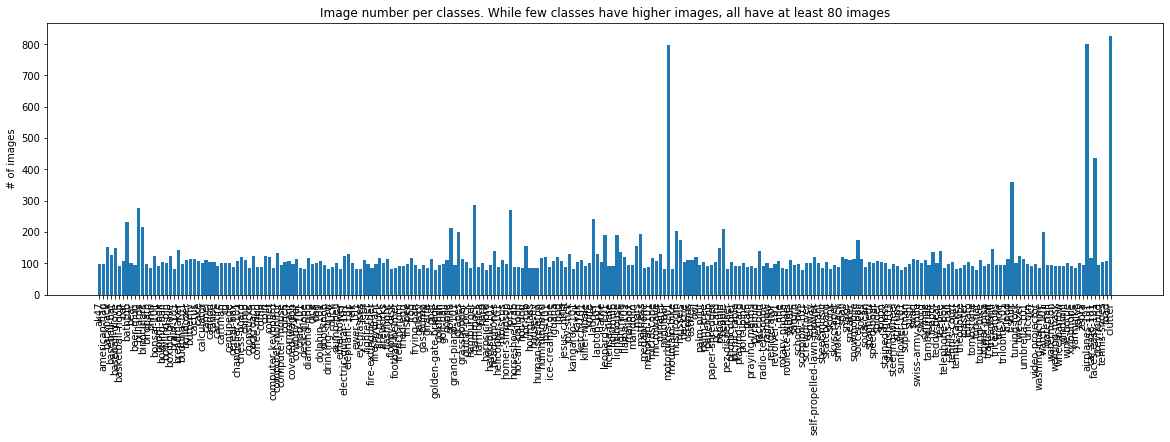

In [7]:
#visualize frequency per class categories
classes=hm.keys()
y_pos=np.arange(len(classes))
plt.figure(figsize=(20,5))
plt.bar(y_pos,class_freqs,align='center', alpha=1)
plt.xticks(y_pos,classes,rotation=90)
plt.ylabel('# of images')
plt.title('Image number per classes. While few classes have higher images, all have at least 80 images')
plt.show()

### Converting Hashmap ```hm``` to (image, class) mapping

The following code maps the images collected in the hashmap ```hm``` that has collected all the square images to (image, class) mapping

In [8]:
#convert hm to X,y data mapping
#where each row of X is an image, y is it's class in int
import random
def make_Xy_Dense(hm,subset_classes):
    classes=list(hm.keys())
    #random.shuffle(classes)
    classes=classes[0:subset_classes]
    X=[]
    y=[]
    for key in classes:
        images=hm[key]
        flatten_images=[]
        for i in images:
            flatten_images.append(i.flatten())
        X.extend(flatten_images)
        y.extend([key]*len(flatten_images))
    X=np.matrix(X)
    y=pd.get_dummies(y)
    
    return X,y

### Making the train:test split

From the first 10 classes, 80% (996 images) have been chosen as training images and the rest 20% (249 images) have been chosen as test images.

In [9]:
X,y=make_Xy_Dense(hm,subset_classes=working_classes)
#make a test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20)

### Converting the images in the shape (128, 128, 3) to pass them to the VGG:


In [10]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train = X_train.reshape(-1,img_size,img_size,3)
X_test = X_test.reshape(-1,img_size,img_size,3)

### VGG without data augmentation

In [11]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.
C:\Users\proti\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\proti\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\proti\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\proti\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras.backend as K
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, MaxPool2D, AvgPool2D,Flatten

total_layers = 3
filters = 32
learning_rate = .001
epochs = 80
batch_size = 32
decay = learning_rate/epochs
optimizer = Adam(lr=learning_rate,decay=decay)

In [14]:
def createCNNModel(total_layers, filters, learning_rate, epochs, batch_size, decay, optimizer):
    model = Sequential()
    model.add(Conv2D(filters = (filters), kernel_size= (3,3), input_shape = (img_size,img_size,3), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    print('filter: '+ str(filters))

    for i in range(total_layers):
        fltr = filters * (2**(i+1))
        model.add(Conv2D(filters = fltr, kernel_size= (3,3), padding = 'same'))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(MaxPool2D(pool_size = (2,2)))
        print('filter: '+ str(filters * (2**(i+1))))

    print('\n')
    model.add(Flatten())

    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu')) 

    model.add(Dense(10,activation='softmax'))
    model.compile(optimizer, 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model
    

In [15]:
model = createCNNModel(total_layers, filters, learning_rate, epochs, batch_size, decay, optimizer)


filter: 32
filter: 64
filter: 128
filter: 256




In [16]:
model.fit_generator(ImageDataGenerator().flow(X_train, y_train.values, batch_size=batch_size),
                    steps_per_epoch=len(X_train) / batch_size, 
                    epochs=10,
                    verbose=1,
                    validation_data=(X_test, y_test.values))


Epoch 1/10
32/31 [==============================] - 66s 2s/step - loss: 1.9656 - accuracy: 0.4378 - val_loss: 2.4841 - val_accuracy: 0.2610
Epoch 2/10
32/31 [==============================] - 69s 2s/step - loss: 1.1592 - accuracy: 0.6185 - val_loss: 2.6652 - val_accuracy: 0.1847
Epoch 3/10
32/31 [==============================] - 68s 2s/step - loss: 0.8184 - accuracy: 0.7369 - val_loss: 2.9026 - val_accuracy: 0.1847
Epoch 4/10
32/31 [==============================] - 67s 2s/step - loss: 0.5380 - accuracy: 0.8283 - val_loss: 3.3420 - val_accuracy: 0.1847
Epoch 5/10
32/31 [==============================] - 69s 2s/step - loss: 0.4587 - accuracy: 0.8705 - val_loss: 3.8026 - val_accuracy: 0.1847
Epoch 6/10
32/31 [==============================] - 68s 2s/step - loss: 0.2510 - accuracy: 0.9367 - val_loss: 3.4418 - val_accuracy: 0.1968
Epoch 7/10
32/31 [==============================] - 71s 2s/step - loss: 0.2130 - accuracy: 0.9428 - val_loss: 3.9845 - val_accuracy: 0.2369
Epoch 8/10
32/31 [=

### VGG with Data Augmentation

In CNN, Data augmentation (using horizontal or vertical shifting, flipping, zoom etc) reduces overfitting. Moreover, If we have a very limited number of images, such inclusions of images will help classify the images better. Also, inclusion of shifted or flipped image makes a model more robust against input images whose orientations do not follow the normal oreintation

In [51]:
generator = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [52]:
layer = 3
filterz = 32
lr = .001
epochs = 80
batch_size = 32
decay = lr/epochs
adam = Adam(lr=lr,decay=decay)

model = Sequential()
model.add(Conv2D(filters = (filterz), kernel_size= (3,3), input_shape = (img_size,img_size,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
print('filter: '+ str(filterz))

for i in range(layer):
    filterz1 = filterz * (2**(i+1))
    model.add(Conv2D(filters = filterz1, kernel_size= (3,3), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    print('filter: '+ str(filterz * (2**(i+1))))

print('\n')
model.add(Flatten())

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu')) 

model.add(Dense(10,activation='softmax'))
model.compile(adam, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

filter: 32
filter: 64
filter: 128
filter: 256




In [54]:
model.fit_generator(generator.flow(X_train, y_train.values, batch_size=batch_size),
                    steps_per_epoch=len(X_train) / batch_size, 
                    epochs=10,
                    verbose=1,
                    validation_data=(X_test, y_test.values))

Epoch 1/10
32/31 [==============================] - 74s 2s/step - loss: 2.2040 - accuracy: 0.3705 - val_loss: 2.8505 - val_accuracy: 0.2129
Epoch 2/10
32/31 [==============================] - 72s 2s/step - loss: 1.6603 - accuracy: 0.4448 - val_loss: 3.0316 - val_accuracy: 0.1888
Epoch 3/10
32/31 [==============================] - 71s 2s/step - loss: 1.4854 - accuracy: 0.5010 - val_loss: 2.7904 - val_accuracy: 0.2088
Epoch 4/10
32/31 [==============================] - 74s 2s/step - loss: 1.4726 - accuracy: 0.5040 - val_loss: 2.8199 - val_accuracy: 0.1888
Epoch 5/10
32/31 [==============================] - 78s 2s/step - loss: 1.4628 - accuracy: 0.5141 - val_loss: 3.5553 - val_accuracy: 0.2008
Epoch 6/10
32/31 [==============================] - 70s 2s/step - loss: 1.3336 - accuracy: 0.5432 - val_loss: 2.3405 - val_accuracy: 0.2369
Epoch 7/10
32/31 [==============================] - 68s 2s/step - loss: 1.3935 - accuracy: 0.5191 - val_loss: 2.9318 - val_accuracy: 0.2008
Epoch 8/10
32/31 [==